In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from IPython.display import Markdown
from medpredictor import Graph, Config, DataFrameOperations, Utils, MetricsDisplay

### **Setting up the dataframe**

In [2]:
df = pd.read_csv(Config.data_cleaned_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  object 
 1   HighBP                253680 non-null  object 
 2   HighChol              253680 non-null  object 
 3   CholCheck             253680 non-null  object 
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  object 
 6   Stroke                253680 non-null  object 
 7   HeartDiseaseorAttack  253680 non-null  object 
 8   PhysActivity          253680 non-null  object 
 9   Fruits                253680 non-null  object 
 10  Veggies               253680 non-null  object 
 11  HvyAlcoholConsump     253680 non-null  object 
 12  AnyHealthcare         253680 non-null  object 
 13  NoDocbcCost           253680 non-null  object 
 14  GenHlth               253680 non-null  object 
 15  

In [3]:
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,No diabetes,Yes,Yes,Yes,40.0,Yes,No,No,No,No,...,Yes,No,Poor,18.0,15.0,Yes,Female,60 to 64,High school graduate,$15k to less than $20k
1,No diabetes,No,No,No,25.0,Yes,No,No,Yes,No,...,No,Yes,Good,0.0,0.0,No,Female,50 to 54,College graduate,"Less than $10,000"
2,No diabetes,Yes,Yes,Yes,28.0,No,No,No,No,Yes,...,Yes,Yes,Poor,30.0,30.0,Yes,Female,60 to 64,High school graduate,"$75,000 or more"
3,No diabetes,Yes,No,Yes,27.0,No,No,No,Yes,Yes,...,Yes,No,Very good,0.0,0.0,No,Female,70 to 74,Some high school,$35k to less than $50k
4,No diabetes,Yes,Yes,Yes,24.0,No,No,No,Yes,Yes,...,Yes,No,Very good,3.0,0.0,No,Female,70 to 74,Some college or technical school,$20k to less than $25k


In [4]:
df.describe()

,BMI,MentHlth,PhysHlth
count,253680.000000,253680.000000,253680.000000
mean,28.382364,3.184772,4.242081
std,6.608694,7.412847,8.717951
min,12.000000,0.000000,0.000000
25%,24.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000
75%,31.000000,2.000000,3.000000
max,98.000000,30.000000,30.000000


From this numeric features we can get this insights:

**Body Mass Index (BMI)**
* The mean for this index is ~28.38.
* The standard deviation for this feature is ~6.61. As we can see, this is a low value, so data's dispersion is low too.
* The minimum index registered in this dataset is 12. This indicates us that at least one respondent has underweight,  which might require medical attention.
* The maximum index registered in this dataset is 98. This is a less common index's value that could be due to errors in data entry.
* The 50% of the respondets answered 27 as theirs body mass index, which is around the upper limit of the 'normal' BMI range  taking into account respondent's age and sex.
* The 75% of the respondents ansewered 31 as theirs body mass index. According to respondent's age and sex, this could be dangerous. A BMI of 31 falls within the overweight or obese category, which can increase health risks.

**Days of poor mental health (MetHlth)**
* The mean for this feature is ~3.18. 
* The standard deviation for this feature is ~7.41, indicating high variability in the number of poor mental health days among respondents.
* The high standard deviation suggests that while many respondents have few poor mental health days, a subset experiences significantly more, potentially requiring targeted mental health interventions.
* The minimum number of days registered in this dataset is 0. This indicates that at least one respondent is in good mental health.
* The maximum number of days registerd in this dataset is 30. This indicates that at least one person needs to take care of his/her mental health. 
* 75% of the respondents reported having 2 or fewer days of bad mental health.. This is very positive, because it indicates that the respondents are in good mental health.

**Physical illness or injury days in past 30 days (PhysHlth)**
* The mean of 4 days suggests that, on average, respondents experienced physical illness or injury for about 4 days in the past month, which might be a concern depending on the nature and severity of these conditions.
* The standard deviation for this feature is ~8.72. As we can see, this is a high value, so data's dispersion is high too.
* The minimum number of days registered in this dataset is 0. This positive, because at least one respondent didn't suffer any illness or injury.
* The maximum number of days registered in this dataset is 30. This indicates that at least one person suffered an illness or injury for 30 days.
* 75% of the respondents reported experiencing 3 or fewer days of physical illness or injury. 

### **Utils**

In [71]:
# code section to add new functions

def show_metric(name_metric, metric):
    display(Markdown(f"{name_metric}: {metric}%"))
    return

def set_gradual_colors(values, palette):
    cmap = plt.get_cmap(palette, len(values))
    hex_colors = [mcolors.to_hex(cmap(i)) for i in range(len(values))]
    dict_colors = dict(zip(values, hex_colors))
    colors = list(dict_colors.values())
    return colors

def sex_metrics(df, column_1, column_2, values_sex_order, values_filter_order):
    values_subset = set(list(df[column_1].unique()))
    metrics_female = {}
    metrics_male = {}
    total_registers = int(df.value_counts().sum())

    df_o = DataFrameOperations(df=df)
    sex_column, filter_column = df_o.column_identifier(column_1=column_1, column_2=column_2, values_subset=values_subset)

    if column_1 not in df.columns or column_2 not in df.columns:
        raise ValueError(f"The columns '{column_1}' or '{column_2}' don't exist in the DataFrame.")

    values_sex = sorted(list(df[sex_column].unique()), key=lambda x:values_sex_order.index(x))
    values_filter = sorted(list(df[filter_column].unique()), key=lambda x: values_filter_order.index(x))

    for value_sex in values_sex:
        for value_filter in values_filter:
            result = df_o.filter_group_registers(column_1=sex_column, 
                                                 column_2=filter_column, 
                                                 condition=((df[sex_column] == value_sex) & (df[filter_column] == value_filter)))
            percentaje = Utils().calc_percentajes(value=result.get('result'), total=total_registers)
            if value_sex == 'Female':
                metrics_female.update({value_filter:round(float(percentaje), 2)})
            if value_sex == 'Male':
                metrics_male.update({value_filter:round(float(percentaje), 2)})

    return metrics_female, metrics_male


def health_status_metrics(df, column_1, column_2, values_status_order, values_filter_order):
    values_subset = set(list(df[column_1].unique()))
    metrics_excellent = {}
    metrics_v_good = {}
    metrics_good = {}
    metrics_fair = {}
    metrics_poor = {}
    total_registers = int(df.value_counts().sum())

    df_o = DataFrameOperations(df)
    status_column, filter_column = df_o.column_identifier(column_1=column_1, column_2=column_2, values_subset=values_subset)

    if column_1 not in df.columns or column_2 not in df.columns:
        raise ValueError(f"The columns '{column_1}' or '{column_2}' don't exist in the DataFrame.")
    
    values_states = sorted(list(df[status_column].unique()), key=lambda x: values_status_order.index(x))
    values_filter = sorted(list(df[filter_column].unique()), key=lambda x: values_filter_order.index(x))

    for value_state in values_states:
        for value_filter in values_filter:
            result = df_o.filter_group_registers(column_1=status_column,
                                                 column_2=filter_column,
                                                 condition=((df[status_column] == value_state) & (df[filter_column] == value_filter)))
            percentaje = Utils().calc_percentajes(value=result.get('result'), total=total_registers)
            if value_state == 'Excellent':
                metrics_excellent.update({value_filter:round(float(percentaje), 2)})
            elif value_state == 'Very good':
                metrics_v_good.update({value_filter:round(float(percentaje), 2)})
            elif value_state == 'Good':
                metrics_good.update({value_filter:round(float(percentaje), 2)})
            elif value_state == 'Fair':
                metrics_fair.update({value_filter:round(float(percentaje), 2)})
            elif value_state == 'Poor':
                metrics_poor.update({value_filter:round(float(percentaje), 2)})

    return metrics_excellent, metrics_v_good, metrics_good, metrics_fair, metrics_poor

def age_metrics(df, column_1, column_2, values_age_order, values_filter_order):
    values_subset = set(list(df[column_1].unique()))
    metrics_young = {}
    metrics_young_a = {}
    metrics_middle_a = {}
    metrics_late_a = {}
    metrics_old_age = {}
    total_registers = int(df.value_counts().sum())

    df_o = DataFrameOperations(df)
    age_column, filter_column = df_o.column_identifier(column_1=column_1, column_2=column_2, values_subset=values_subset)

    if column_1 not in df.columns or column_2 not in df.columns:
        raise ValueError(f"The columns '{column_1}' or '{column_2}' don't exist in the DataFrame.")
    
    values_ages = sorted(list(df[age_column].unique()), key=lambda x: values_age_order.index(x))
    values_filter = sorted(list(df[filter_column].unique()), key=lambda x: values_filter_order.index(x))

    for value_age in values_ages:
        for value_filter in values_filter:
            result = df_o.filter_group_registers(column_1=age_column,
                                                 column_2=filter_column,
                                                 condition=((df[age_column] == value_age) & (df[filter_column] == value_filter)))
            percentaje = Utils().calc_percentajes(value=result.get('result'), total=total_registers)
            if value_age == 'Young':
                metrics_young.update({value_filter:round(float(percentaje), 2)})
            elif value_age == 'Young adulthood':
                metrics_young_a.update({value_filter:round(float(percentaje), 2)})
            elif value_age == 'Middle adulthood':
                metrics_middle_a.update({value_filter:round(float(percentaje), 2)})
            elif value_age == 'Late adulthood':
                metrics_late_a.update({value_filter:round(float(percentaje), 2)})
            elif value_age == 'Old age':
                metrics_old_age.update({value_filter:round(float(percentaje), 2)})

    return metrics_young, metrics_young_a, metrics_middle_a, metrics_late_a, metrics_old_age

def income_metrics(df, column_1, column_2, values_income_order, values_filter_order):
    values_subset = set(list(df[column_1].unique()))
    metrics_l_10 = {}
    metrics_b_10_15 = {}
    metrics_b_15_20 = {}
    metrics_b_20_25 = {}
    metrics_b_25_35 = {}
    metrics_b_35_50 = {}
    metrics_b_50_75 = {}
    metrics_m_75 = {}
    total_registers = int(df.value_counts().sum())

    df_o = DataFrameOperations(df)
    income_column, filter_column = df_o.column_identifier(column_1=column_1, column_2=column_2, values_subset=values_subset)

    if column_1 not in df.columns or column_2 not in df.columns:
        raise ValueError(f"The columns '{column_1}' or '{column_2}' don't exist in the DataFrame.")
    
    values_income = sorted(list(df[income_column].unique()), key=lambda x: values_income_order.index(x))
    values_filter = sorted(list(df[filter_column].unique()), key=lambda x: values_filter_order.index(x))

    for value_income in values_income:
        for value_filter in values_filter:
            result = df_o.filter_group_registers(column_1=income_column,
                                                 column_2=filter_column,
                                                 condition=((df[income_column] == value_income) & (df[filter_column] == value_filter)))
            percentaje = Utils().calc_percentajes(value=result.get('result'), total=total_registers)
            if value_income == 'Less than $10,000':
                metrics_l_10.update({value_filter:round(float(percentaje), 2)})
            elif value_income == '$10k to less than $15k':
                metrics_b_10_15.update({value_filter:round(float(percentaje), 2)})
            elif value_income == '$15k to less than $20k':
                metrics_b_15_20.update({value_filter:round(float(percentaje), 2)})
            elif value_income == '$20k to less than $25k':
                metrics_b_20_25.update({value_filter:round(float(percentaje), 2)})
            elif value_income == '$25k to less than $35k':
                metrics_b_25_35.update({value_filter:round(float(percentaje), 2)})
            elif value_income == '$35k to less than $50k':
                metrics_b_35_50.update({value_filter:round(float(percentaje), 2)})
            elif value_income == '$50k to less than $75k':
                metrics_b_50_75.update({value_filter:round(float(percentaje), 2)})
            elif value_income == '$75,000 or more':
                metrics_m_75.update({value_filter:round(float(percentaje), 2)}) 

    metrics_income = {'Less than $10,000': metrics_l_10, 
                '$10k to less than $15k': metrics_b_10_15, 
                '$15k to less than $20k': metrics_b_15_20, 
                '$20k to less than $25k': metrics_b_20_25,
                '$25k to less than $35k': metrics_b_25_35, 
                '$35k to less than $50k': metrics_b_35_50, 
                '$50k to less than $75k': metrics_b_50_75, 
                '$75,000 or more': metrics_m_75}
    
    return metrics_income


In [68]:
values_age_order = ['18 to 24','25 to 29', '30 to 34', '35 to 39',
                '40 to 44', '45 to 49', '50 to 54', '55 to 59',
                '60 to 64', '65 to 69', '70 to 74', '75 to 79', '80 or older']

### **Analysis respondents' demographic features**

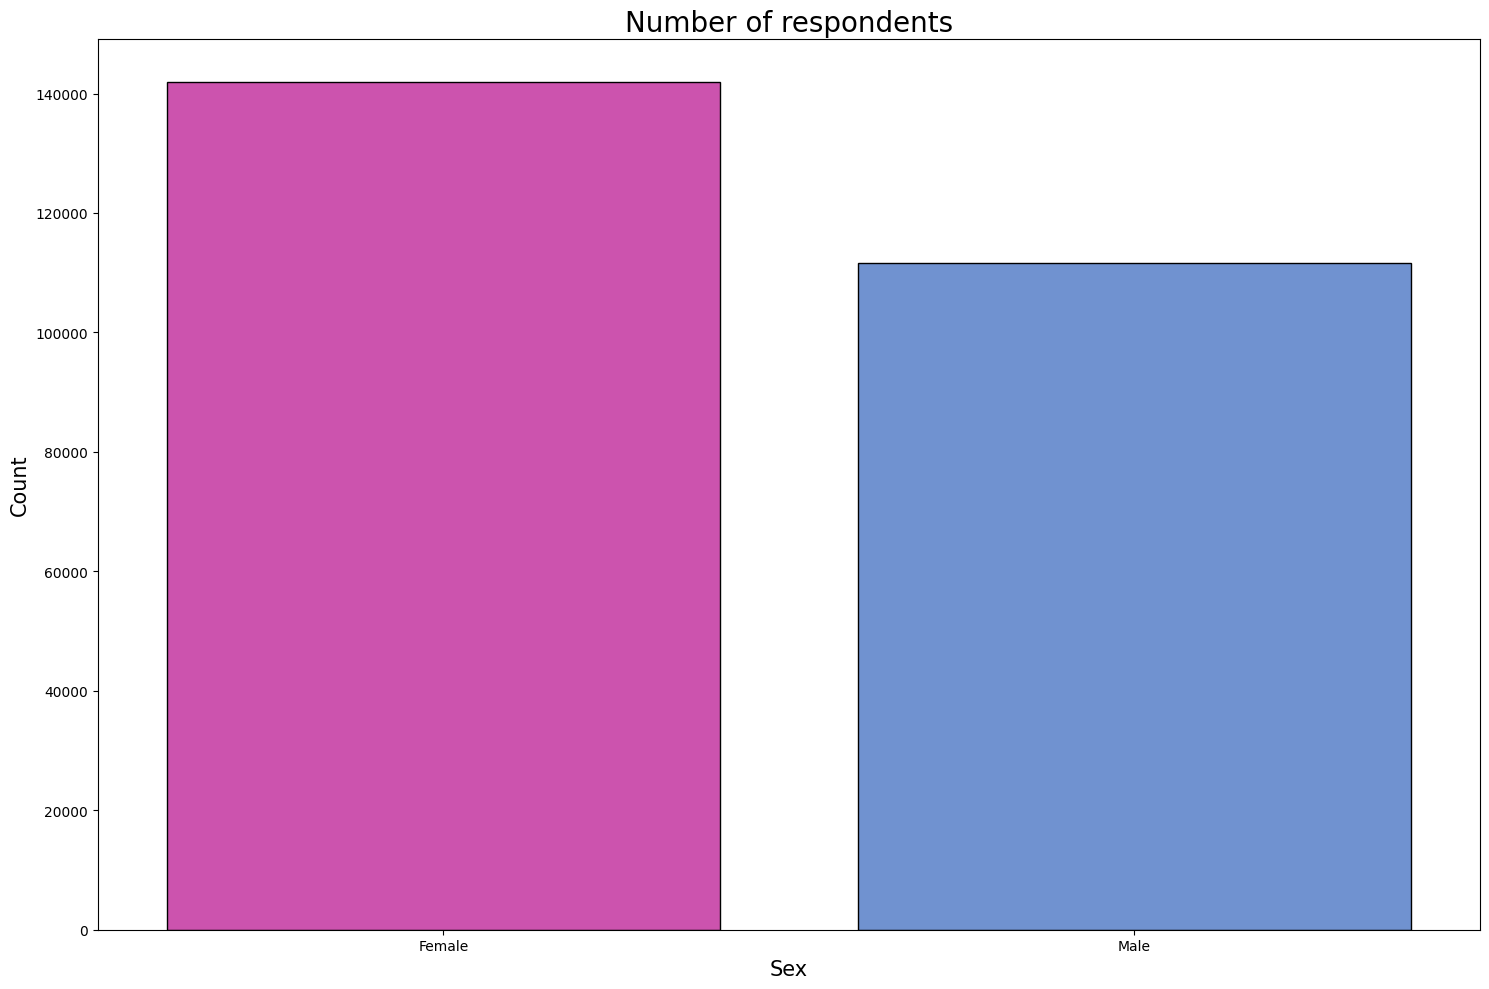

In [6]:
values_sex = df['Sex'].value_counts().reset_index()
values_sex.columns = ['Sex', 'Count']
colors = ['#E03FB8','#608DE0']
title = "Number of respondents"
x_label = "Sex"
y_label = "Count"

graph_sex = Graph(colors=colors, 
              graph_title=title, 
              xlabel_name=x_label, 
              ylabel_name=y_label)

graph_sex.bar_plot_sns(x='Sex', y='Count', data=values_sex, hue='Sex')


To establish a starting point for this study, the number of respondents has been investigated by gender. As can be seen, the dataset has more female respondents than male respondents. This indicates that the feature "Sex" is unbalanced.

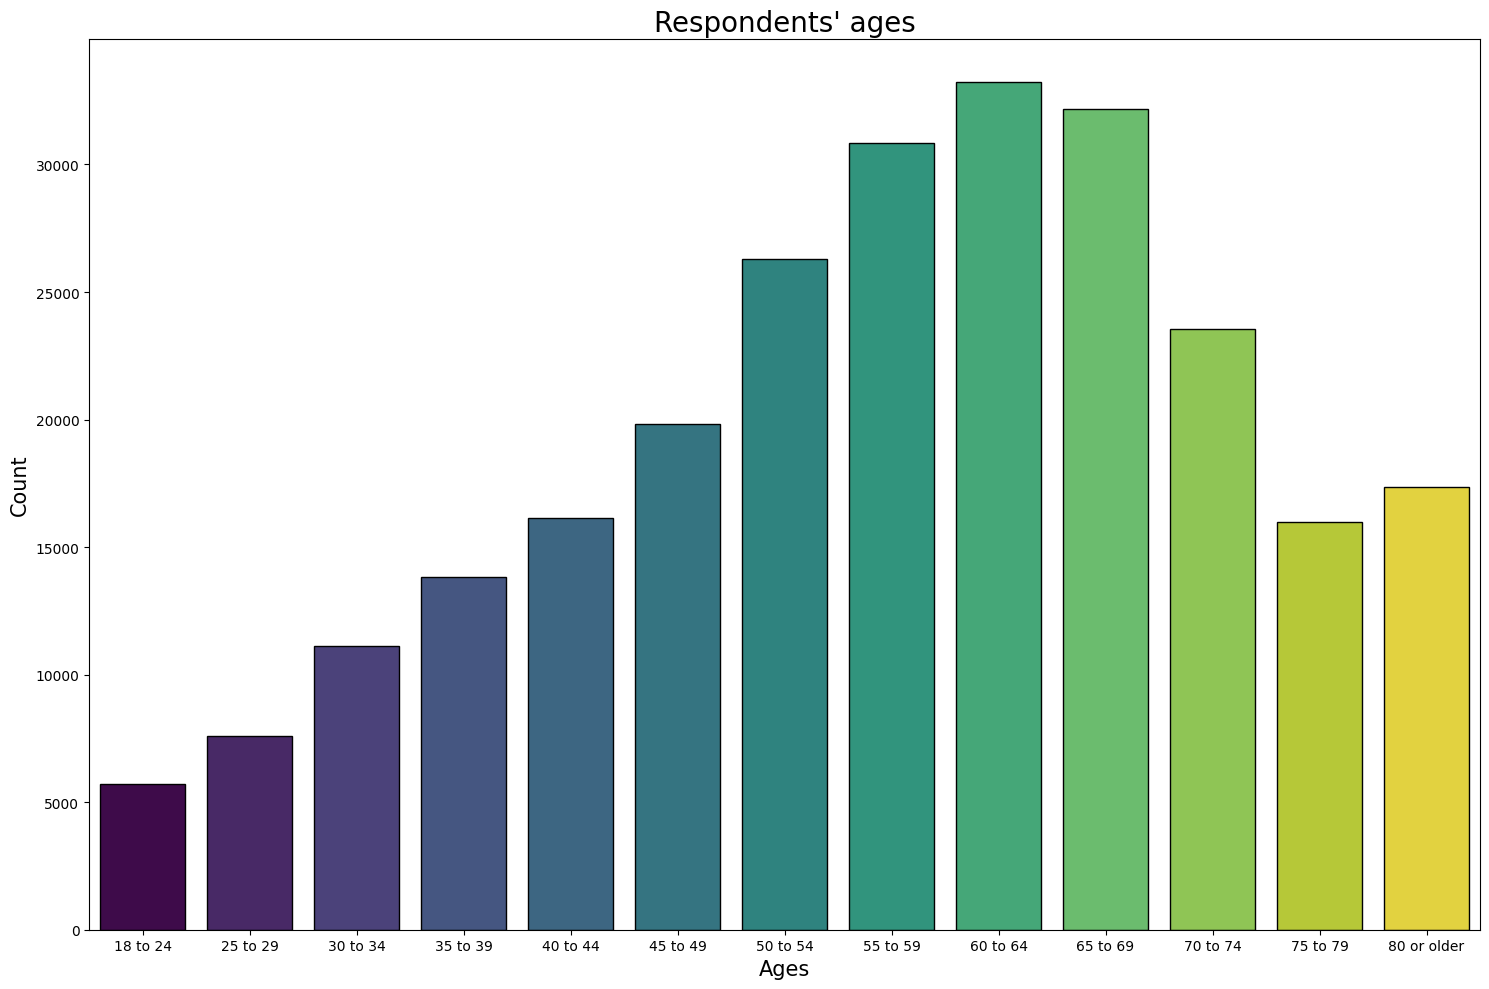

In [70]:
values_age = df['Age'].value_counts().reset_index()
values_age.columns = ['Ages', 'Count']
values_age['Ages'] = pd.Categorical(values_age['Ages'], categories=values_age_order, ordered=True)
values_age = values_age.sort_values('Ages')

title = "Respondents' ages"
x_label = "Ages"
y_label = "Count"
colors = set_gradual_colors(values_age_order, 'viridis')

graph_age = Graph(graph_title=title,
                  xlabel_name=x_label,
                  ylabel_name=y_label,
                  colors=colors)

graph_age.bar_plot_sns(x='Ages', y='Count', hue='Ages', data=values_age)


In this bar chart we can see that the majority of respondents are adults between the ages of 50 and 74. This could indicate a clear bias in the target audience of the survey.

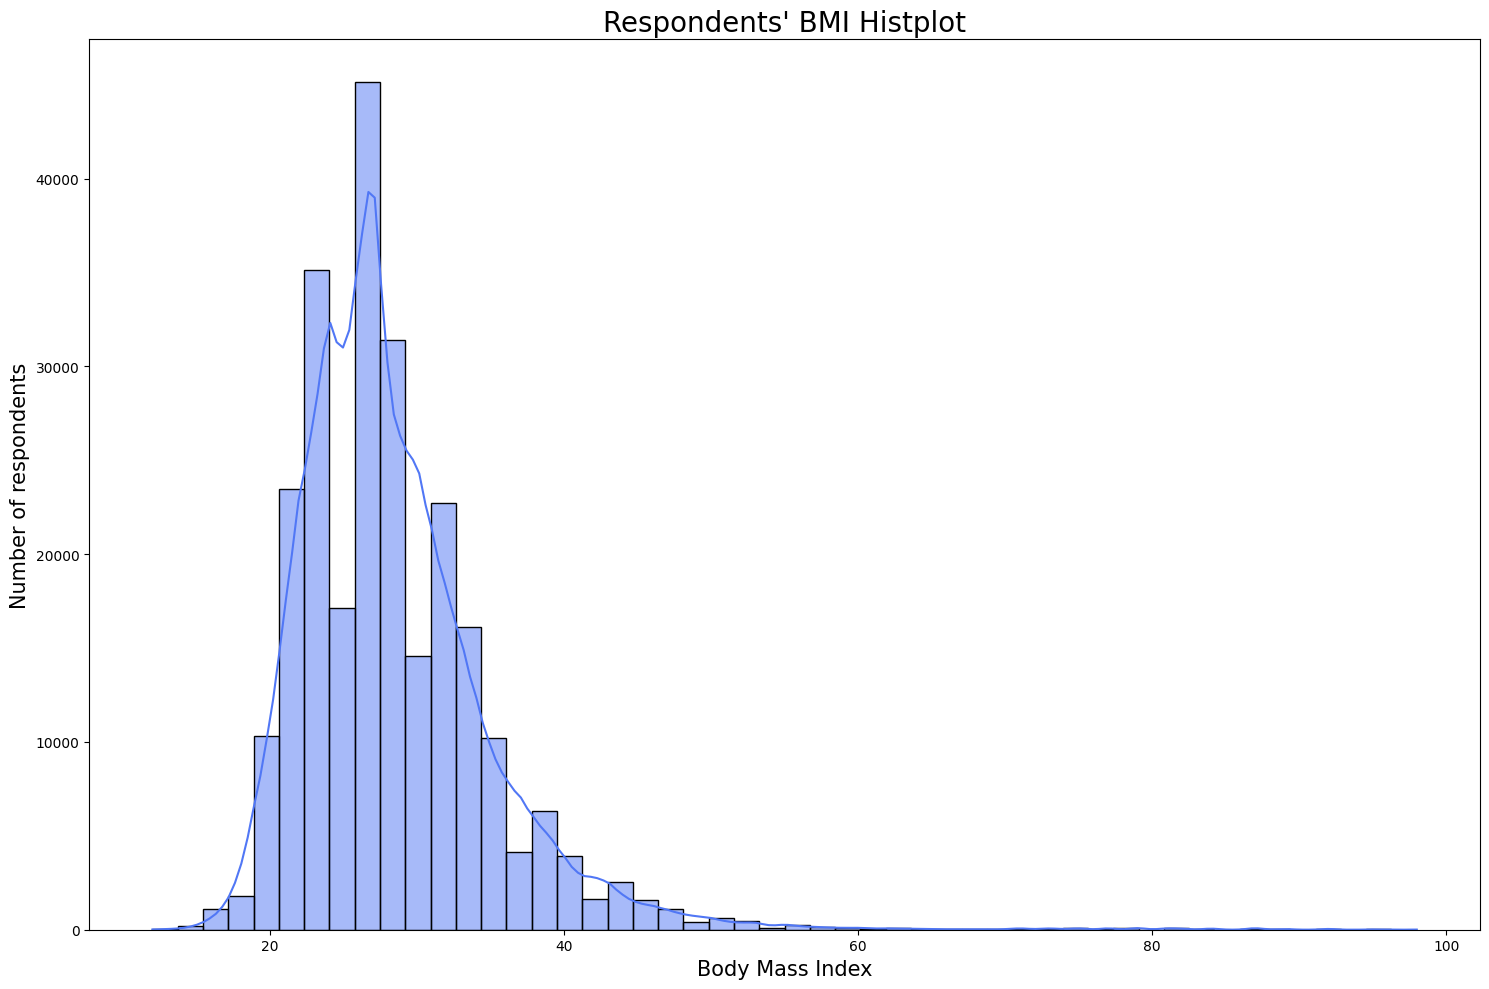

In [8]:
title = "Respondents' BMI Histplot"
x_label = "Body Mass Index"
y_label = "Number of respondents"
color = '#5177F5'

graph_bmi = Graph(graph_title=title, 
                  xlabel_name=x_label, 
                  ylabel_name=y_label,
                  colors=color)

graph_bmi.hist_plot_sns(x='BMI', data=df, kde=True)

From the graph presented, an asymmetrical distribution of the data towards the left can be observed. Furthermore, if we pay attention to the index interval whose lower limit is 20 and upper limit 40, we can see that the highest number of values is concentrated.

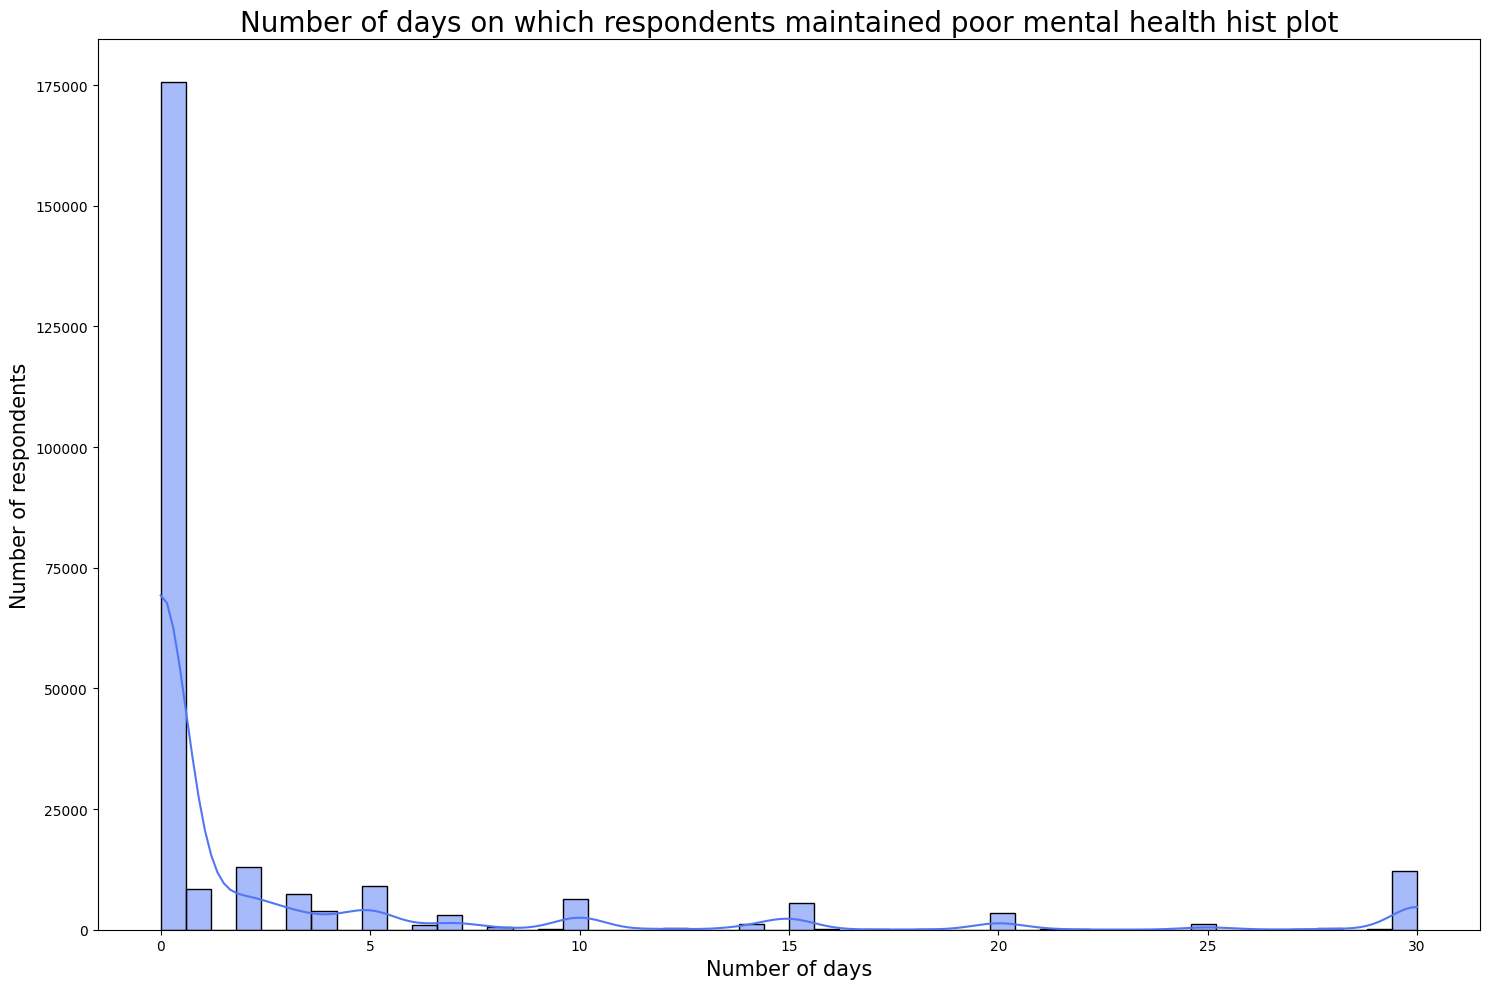

In [9]:
title = "Number of days on which respondents maintained poor mental health hist plot"
x_label = "Number of days"
y_label = "Number of respondents"
color = '#5177F5'

graph_days_mph = Graph(graph_title=title, 
                       xlabel_name=x_label, 
                       ylabel_name=y_label,
                       colors=color)

graph_days_mph.hist_plot_sns(x='MentHlth', data=df, kde=True)

This histogram shows the distribution of the number of days on which respondents reported having poor mental health. As we can see, data's distribution is asymetrical towards the left.

When analysed, it shows that the majority of respondents did not experience days with mental health problems. However, it is relevant to note that 75% of the respondents reported at least one day with poor mental health, reaching a maximum of 30 days.

In [60]:
display(Markdown("### **Respondents' annual income**"))
values_income_table = df['Income'].value_counts().reset_index(name='count')
values_income_table.columns = ['Annual income', 'Number of registers']
values_income_table['Annual income'] = pd.Categorical(values_income_table['Annual income'])
values_income_table['Annual income'] = values_income_table['Annual income'].str.replace(r'\$', '\\$', regex=True)
values_income_table

### **Respondents' annual income**

,Annual income,Number of registers
0,"\$75,000 or more",90385
1,\$50k to less than \$75k,43219
2,\$35k to less than \$50k,36470
3,\$25k to less than \$35k,25883
4,\$20k to less than \$25k,20135
5,\$15k to less than \$20k,15994
6,\$10k to less than \$15k,11783
7,"Less than \$10,000",9811


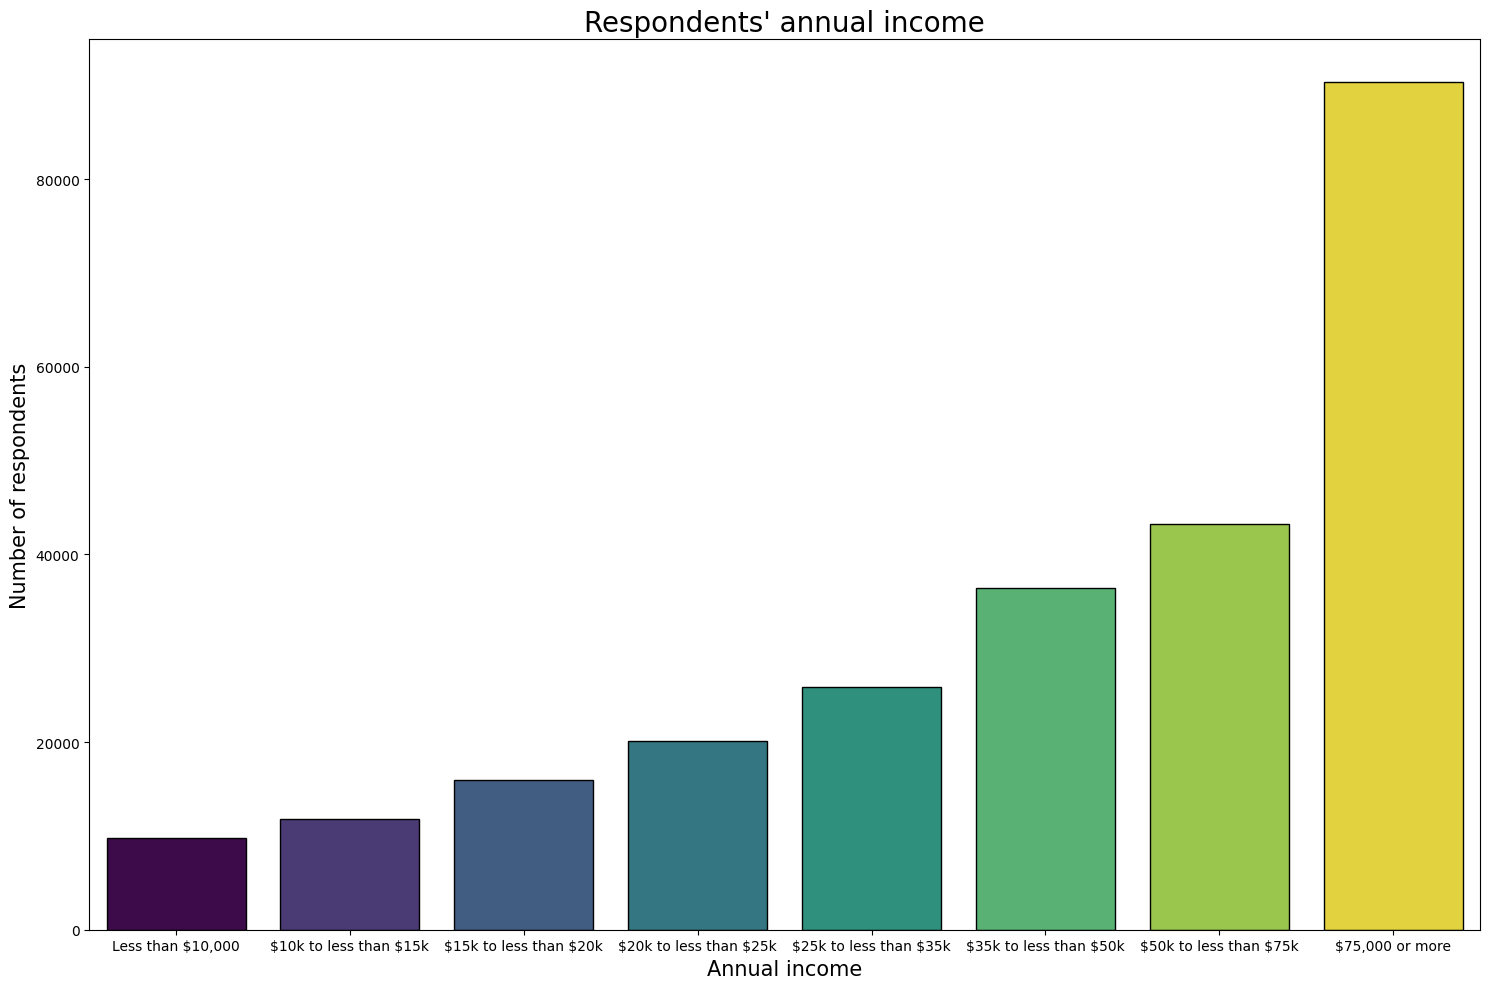

In [11]:
income_order = ['Less than $10,000', 
                '$10k to less than $15k', 
                '$15k to less than $20k', 
                '$20k to less than $25k',
                '$25k to less than $35k', 
                '$35k to less than $50k', 
                '$50k to less than $75k', 
                '$75,000 or more']

values_income = df['Income'].value_counts().reset_index(name='count')
values_income.columns = ['Annual income', 'Number of registers']
values_income['Annual income'] = pd.Categorical(values_income['Annual income'], categories=income_order, ordered=True)
values_income['Annual income'] = values_income['Annual income'].str.replace(r'\$', '\\$', regex=True)
values_income = values_income.sort_values('Annual income')

title = "Respondents' annual income"
x_label = "Annual income"
y_label = "Number of respondents"

cmap = plt.get_cmap('viridis', len(income_order))
hex_colors = [mcolors.to_hex(cmap(i)) for i in range(len(income_order))]
dict_colors = dict(zip(income_order, hex_colors))
colors = list(dict_colors.values())


graph_income = Graph(graph_title=title,
                     xlabel_name=x_label,
                     ylabel_name=y_label,
                     colors=colors)

graph_income.bar_plot_sns(x='Annual income', y='Number of registers', hue='Annual income', data=values_income)

Within this bar chart that provides information about the annual income of respondents, we can see that a large proportion of respondents have annual incomes in excess of $75,000 (90385 respondents). Furthermore, it is worth noting that as annual incomes grow, so do the records of annual incomes, which could indicate a clear bias in the survey.

In [12]:
display(Markdown("### **Respondents' education**"))
values_education = df['Education'].value_counts().reset_index(name='count')
values_education.columns = ['Education', 'Number of registers']
values_education

### **Respondents' education**

,Education,Number of registers
0,College graduate,107325
1,Some college or technical school,69910
2,High school graduate,62750
3,Some high school,9478
4,Elementary,4043
5,Never attended school or only kindergarten,174


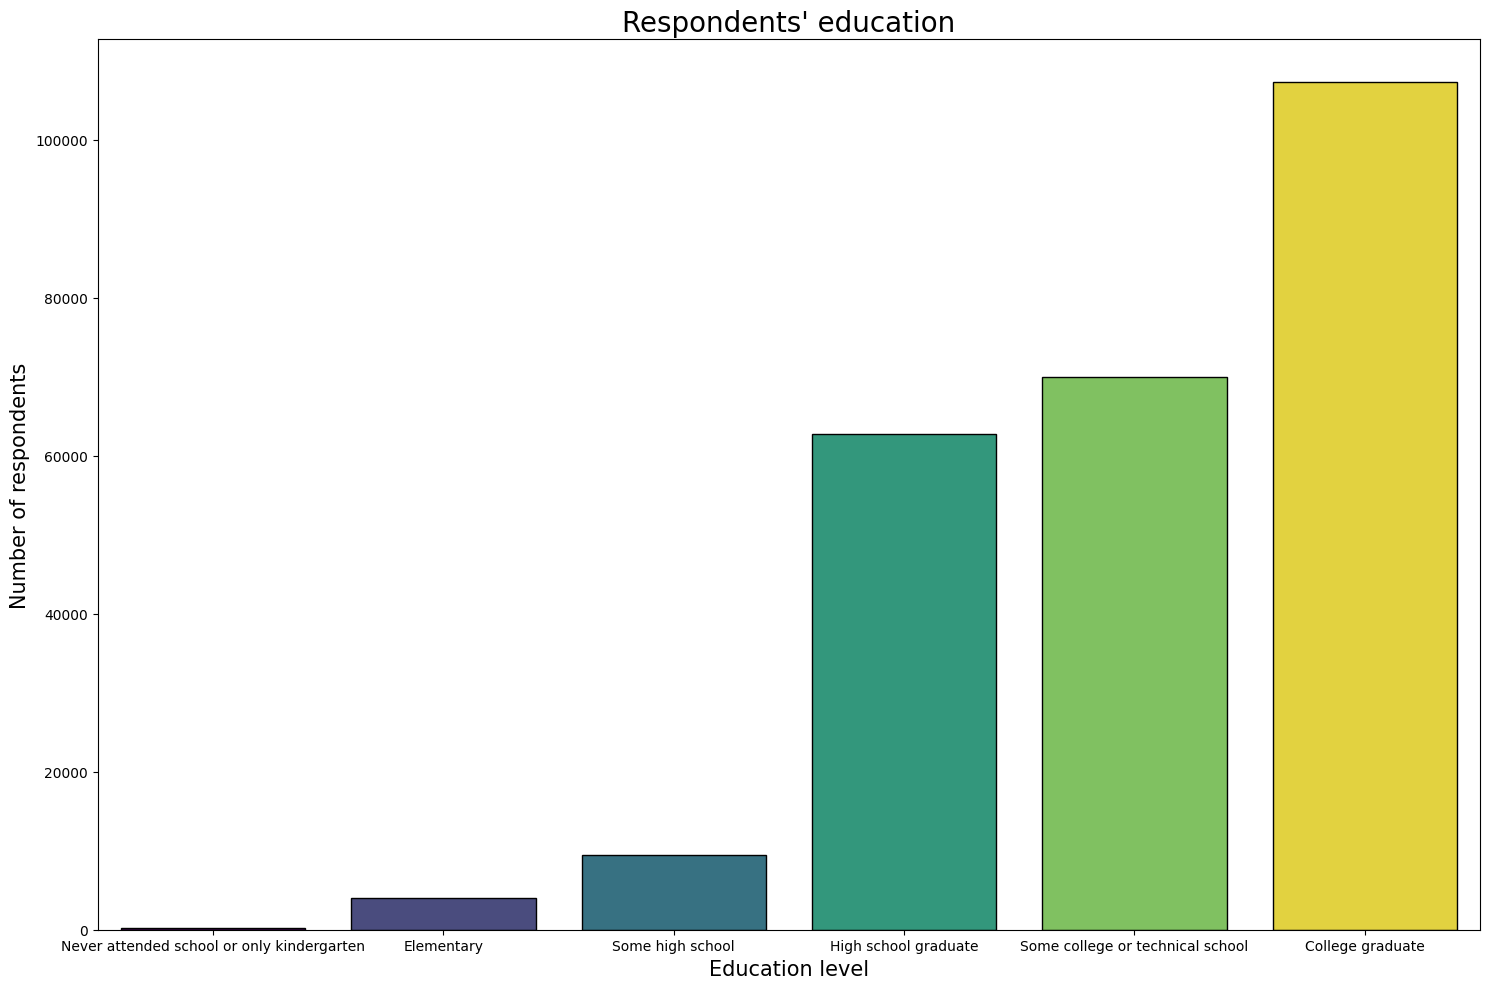

In [13]:
education_order = ['Never attended school or only kindergarten',
                   'Elementary',
                   'Some high school',
                   'High school graduate', 
                   'Some college or technical school',
                   'College graduate']

values_education['Education'] = pd.Categorical(values_education['Education'], categories=education_order, ordered=True)
values_education = values_education.sort_values('Education')

title = "Respondents' education"
x_label = "Education level"
y_label = "Number of respondents"

cmap = plt.get_cmap('viridis', len(education_order))
hex_colors = [mcolors.to_hex(cmap(i)) for i in range(len(education_order))]
dict_colors = dict(zip(education_order, hex_colors))
colors = list(dict_colors.values())

graph_education = Graph(graph_title=title, 
                        xlabel_name=x_label, 
                        ylabel_name=y_label, 
                        colors=colors)

graph_education.bar_plot_sns(x='Education', y='Number of registers', hue='Education', data=values_education)


Within this bar plot, we can see that the majority of the study population has secondary and university level studies. This can be seen in the number of registers which exist for the classes "High school graduate" (62750), "Some college or technical school" (69910) y "College graduate" (107325). However, it should be noted that this indicates a clear bias within the survey towards educated people.

### **Analysis respondents' habits**

In [14]:
df = DataFrameOperations(df).create_combined_column(
                                                new_column_name='eating_habits',
                                                column_1='Fruits',
                                                column_2='Veggies',
                                                function=Utils().good_habits_labeling)

df['eating_habits'].value_counts().reset_index(name='Count')

,eating_habits,Count
0,Eats fruits and vegetables,142712
1,Only eats vegetables,63129
2,Does not eat fruits neither vegetables,29653
3,Only eats fruits,18186


In [15]:
df = DataFrameOperations(df).create_combined_column(new_column_name='bad_habits',
                                                    column_1='HvyAlcoholConsump',
                                                    column_2='Smoker',
                                                    function=Utils().bad_habits_labeling)
df['bad_habits'].value_counts().reset_index(name='Count')

,bad_habits,Count
0,Does not use alcohol neither tobacco,136268
1,Only uses tobacco,103156
2,Uses alcohol and tobacco,9267
3,Only consumes alcohol,4989


### **Respondents who eat fruits and vegetables**

Total: 56.26%

Women: 33.96%

Men: 22.3%

### **Respondents who only eat fruits**

Total: 7.17%

Women: 3.72%

Men: 3.45%

### **Respondents who only eat vegetables**

Total: 24.88%

Women: 12.71%

Men: 12.17%

### **Respondents who don't eat fruits neither vegetables**

Total: 11.69%

Women: 5.58%

Men: 6.11%

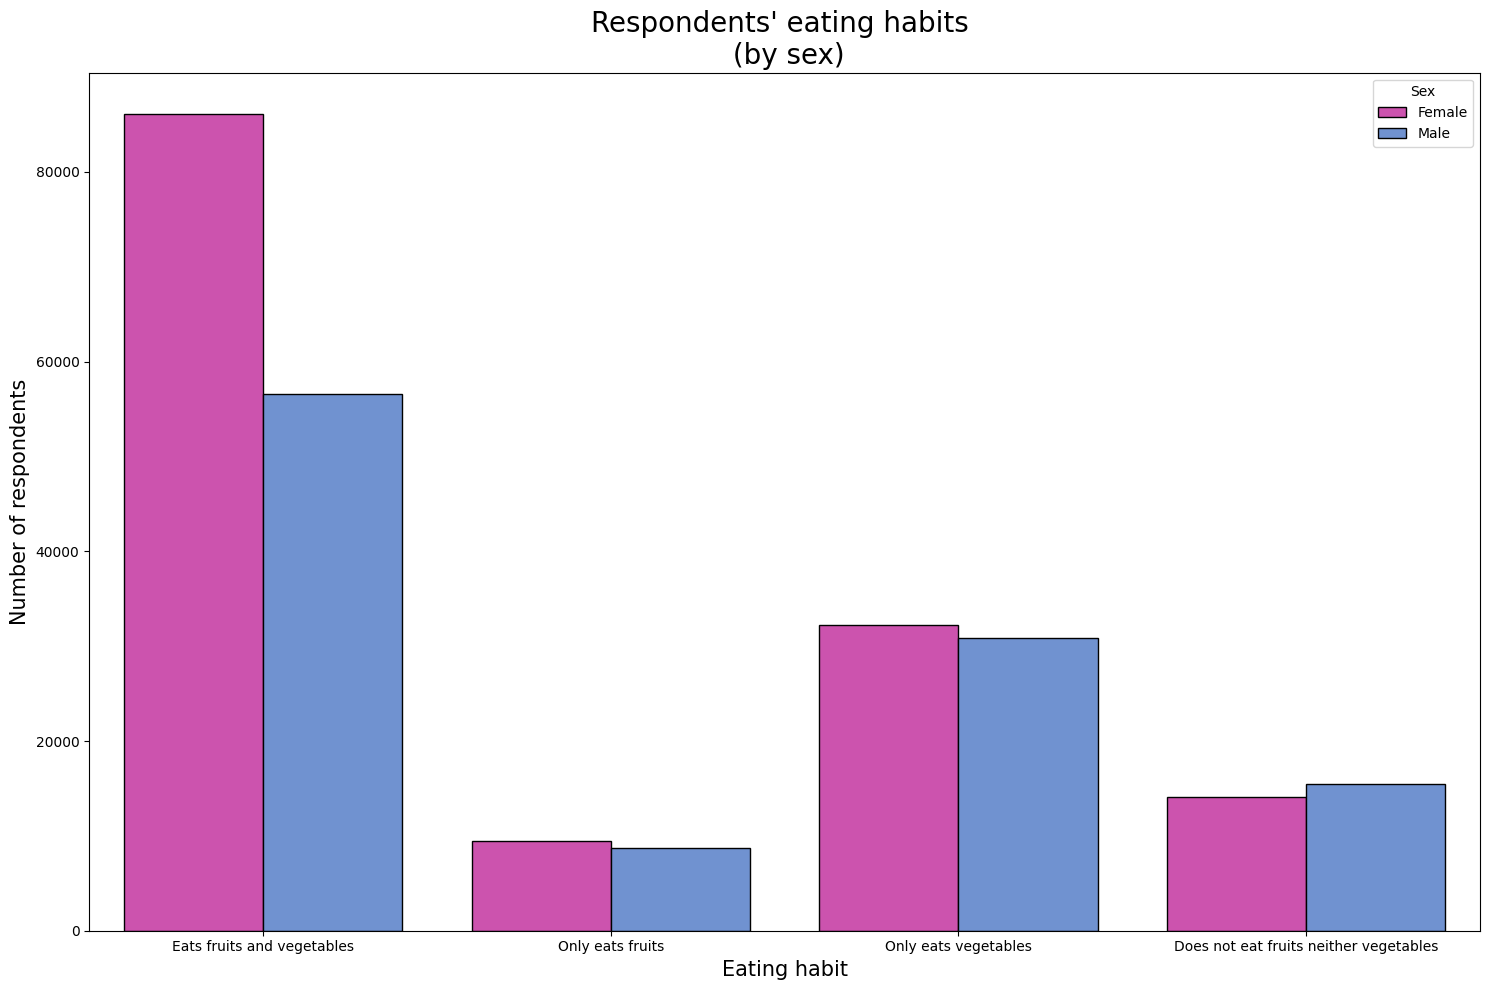

In [16]:
titles = ["Respondents who eat fruits and vegetables", "Respondents who only eat fruits", "Respondents who only eat vegetables", "Respondents who don't eat fruits neither vegetables"]
values_sex_order = ["Female", "Male"]
values_eh_order = ["Eats fruits and vegetables", "Only eats fruits", "Only eats vegetables", "Does not eat fruits neither vegetables"]


f, m = sex_metrics(df, 'Sex', 'eating_habits', values_sex_order, values_eh_order)

for title, value in zip(titles, values_eh_order):
    display(Markdown(f"### **{title}**"))
    show_metric("Total", round(f[value] + m[value], 2))
    show_metric("Women", f[value])
    show_metric("Men", m[value])


group = df.groupby(['Sex', 'eating_habits']).size().reset_index(name='count')

g_title = "Respondents' eating habits \n (by sex)"
x_label = "Eating habit"
y_label = "Number of respondents"
dict_colors = {'Female':'#E03FB8',
               'Male': '#608DE0'}
colors = list(dict_colors.values())

graph_eating_habits = Graph(graph_title=g_title,
                            xlabel_name=x_label,
                            ylabel_name=y_label,
                            colors=colors)

graph_eating_habits.bar_plot_sns(x='eating_habits', y='count', hue='Sex', legend=True, order=values_eh_order, data=group)

From the analysis of the data on fruit and vegetable consumption among the respondents, the following findings were identified:

**People who consume fruits and vegetables**.

This group represents **56.26%** of all respondents, indicating that more than half of them maintain eating habits that include both products. When separated by gender, women make up **33.96%**, outnumbering men, who account for **22.3%**.

**People who consume fruit only**.

Within this section, the total percentage drops to **7.17%**. Women again outnumber men with **3.72%** versus **3.45%**, although the gender difference is less marked compared to the previous group.

**People who consume vegetables only**.

This group includes **24.89%** of respondents. Women account for **12.71%**, while men account for only **12.17%**, showing a better balance between both genders.

**People who do not consume fruit and vegetables**

**11.69%** of respondents reported consuming neither fruit nor vegetables, a relatively low but significant proportion. Within this group, men account for **6.11%**, slightly outnumbering women, who account for **5.58%**.

**Trend analysis**

It is clear that the majority of respondents integrate fruit and vegetables into their diet, with women leading in consumption in all groups that include these foods. However, it is of concern that about **12%** of people do not consume any of these products. This suggests the need to encourage healthier eating habits, especially among men, who tend to have higher percentages in the ‘non-consumption’ category.

### **Health status (overall) of people who were physically active in the last 30 days**

Excellent: 15.77%

Very good: 29.03%

Good: 21.55%

Fair: 7.2%

Poor: 2.1%

### **Health status (overall) of people who weren't physically active in the last 30 days**

Excellent: 2.08%

Very good: 6.08%

Good: 8.27%

Fair: 5.25%

Poor: 2.66%

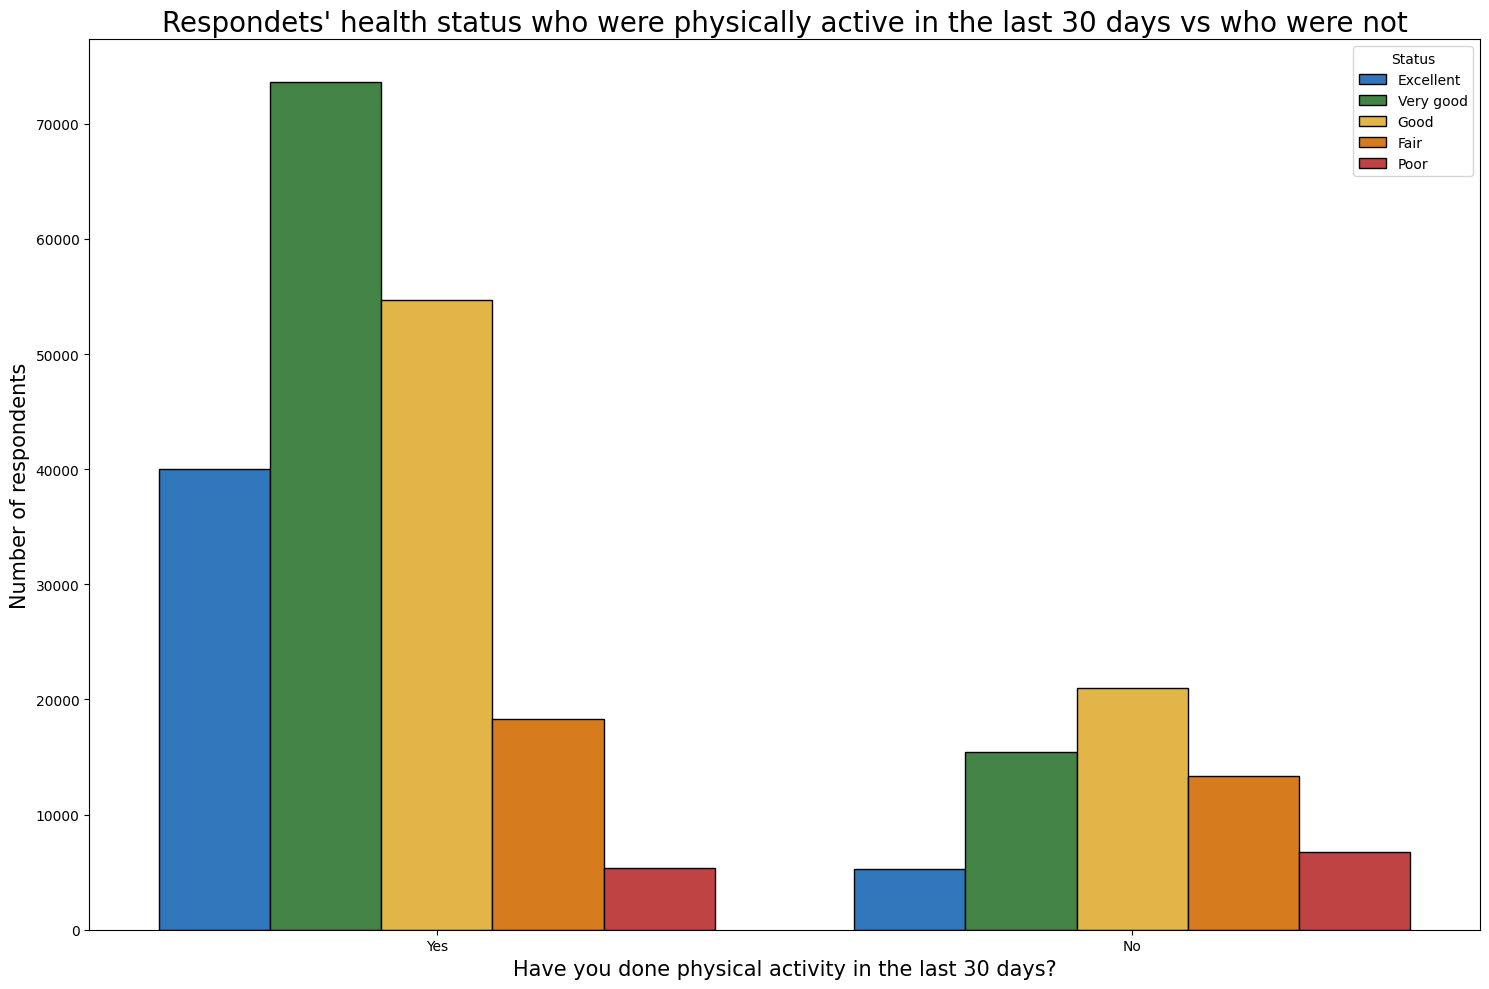

In [17]:
values_order = ['Excellent',
                'Very good',
                'Good',
                'Fair',
                'Poor']
filter_order = ['Yes', 'No']
titles = ["Health status (overall) of people who were physically active in the last 30 days",
          "Health status (overall) of people who weren't physically active in the last 30 days"]


e, v_g, g, f, p = health_status_metrics(df, 'GenHlth', 'PhysActivity', values_order, filter_order)
metrics_dict = {'Excellent':e,
                'Very good':v_g,
                'Good': g,
                'Fair': f,
                'Poor': p}


for title, value in zip(titles, filter_order):
    display(Markdown(f"### **{title}**"))
    for metric in metrics_dict:
        show_metric(metric, metrics_dict[metric][value])
      

group = df.groupby(['GenHlth', 'PhysActivity']).size().reset_index(name='count')
group.columns = ['Status', 'PhysActivity', 'count']

g_title = "Respondets' health status who were physically active in the last 30 days vs who were not"
x_label = "Have you done physical activity in the last 30 days?"
y_label = "Number of respondents"
dict_colors = {'Excellent':'#1976D2',
               'Very good':'#388E3C',
               'Good':'#FBC02D',
               'Fair': '#F57C00',
               'Poor': '#D32F2F'}
colors = list(dict_colors.values())

graph_status = Graph(graph_title=g_title,
                     xlabel_name=x_label,
                     ylabel_name=y_label,
                     colors=colors)

graph_status.bar_plot_sns(x='PhysActivity', y='count', hue='Status', legend=True,data=group, hue_order=values_order, order=filter_order)

From the analysis of the data, the general health status of the respondents was identified, differentiating between those who were physically active in the last 30 days and those who were not.
 
**Health status of respondents who were physically active in the last 30 days**

In this group, there is a significant proportion of people with positive health status. **15.77%** reported an ‘Excellent’ health status, while **29.03%** reported a ‘Very good’ health status. Some **21.55%** were in the ‘Good’ category.

In contrast, less favourable categories have lower representations: **7.2%** reported a ‘Barely good’ status and only **2.1%** indicated having a ‘Bad’ health status.

**Health status of people who were not physically active in the last 30 days**.

Among those who were not physically active, positive health statuses are less frequent. Only **2.08%** reported an ‘Excellent’ health status, while **6.08%** reported being in the ‘Very good’ category. The ‘Good’ category includes **8.27%** of this group.

In the less favourable health status, it can be found that **5.25%** reported a ‘Barely good’ status, and **2.66%** indicated to be in the ‘Bad’ category.

**Trend analysis**

The data suggest a positive relationship between physical activity and general health status. People who were physically active in the last 30 days have a higher proportion of ‘Excellent’ and ‘Very good’ health statuses compared to those who were not physically active. In contrast, people who were not physically active have a stronger tendency towards less favourable health states, reinforcing the importance of maintaining active habits to promote general well-being.

### **Respondents who consume alcohol and tobacco**

Total: 3.65%

Women: 1.91%

Men: 1.74%

### **Respondents who only consume alcohol**

Total: 1.97%

Women: 1.17%

Men: 0.8%

### **Respondents who only use tobacco**

Total: 40.66%

Women: 20.58%

Men: 20.08%

### **Respondents who don't use alcohol neither tobacco**

Total: 53.71%

Women: 32.3%

Men: 21.41%

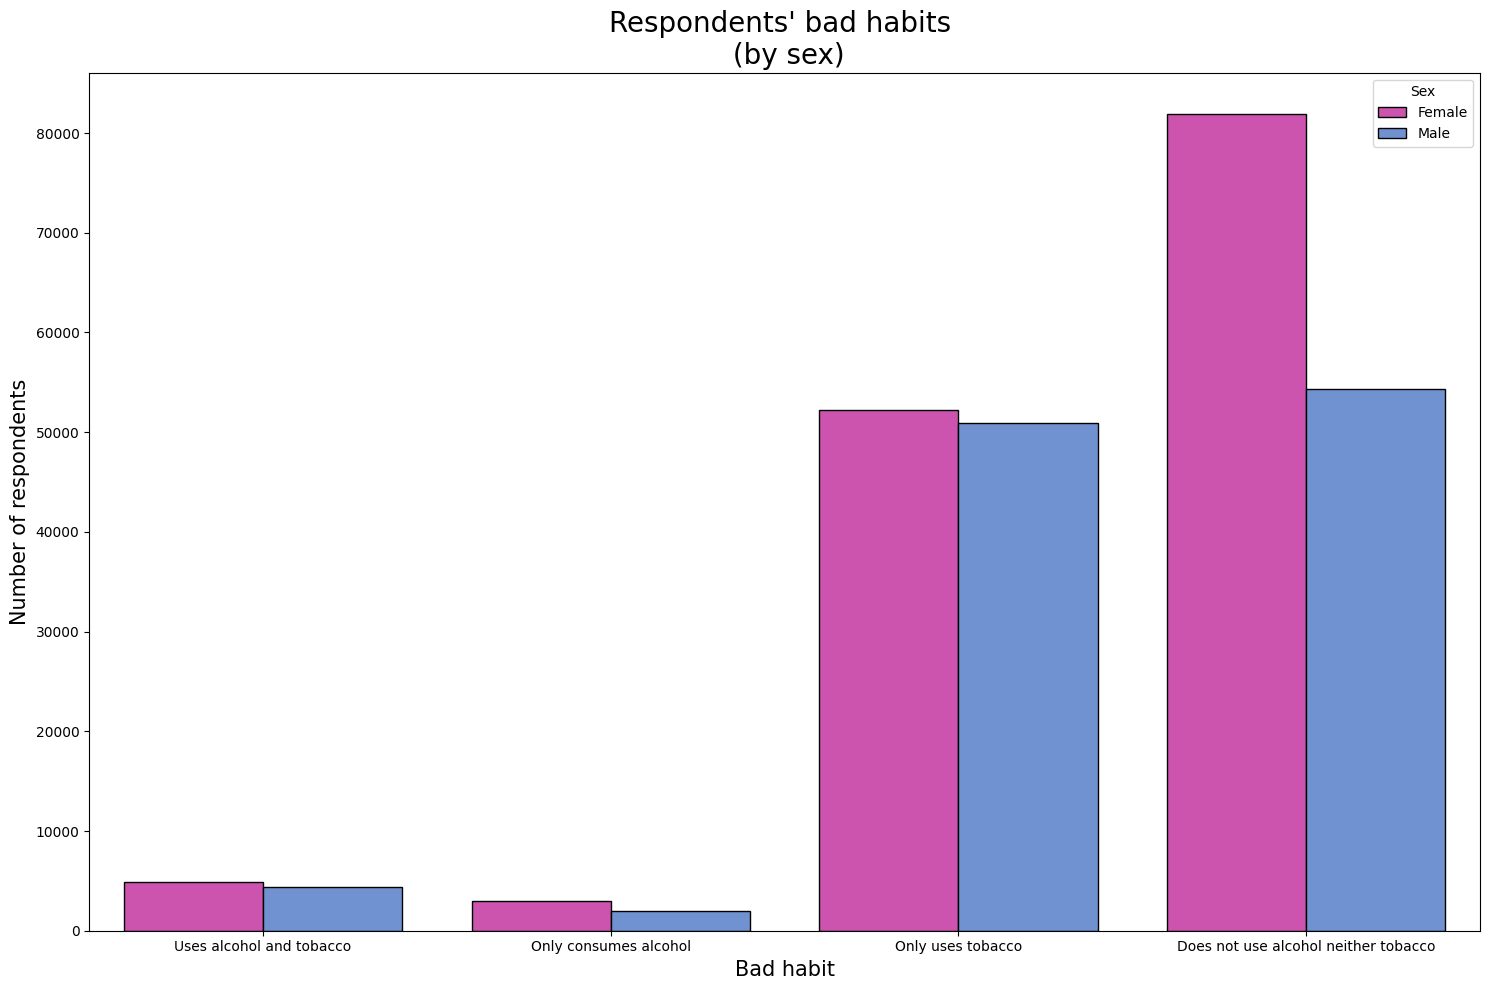

In [18]:
titles = ["Respondents who consume alcohol and tobacco", "Respondents who only consume alcohol", "Respondents who only use tobacco", "Respondents who don't use alcohol neither tobacco"]
values_sex_order = ["Female", "Male"]
values_bh_order = ["Uses alcohol and tobacco", "Only consumes alcohol", "Only uses tobacco", "Does not use alcohol neither tobacco"]


f, m = sex_metrics(df, 'Sex', 'bad_habits', values_sex_order, values_bh_order)

for title, value in zip(titles, values_bh_order):
    display(Markdown(f"### **{title}**"))
    show_metric("Total", round(f[value] + m[value], 2))
    show_metric("Women", f[value])
    show_metric("Men", m[value])


group = df.groupby(['Sex', 'bad_habits']).size().reset_index(name='count')

g_title = "Respondents' bad habits \n (by sex)"
x_label = "Bad habit"
y_label = "Number of respondents"
dict_colors = {'Female':'#E03FB8',
               'Male': '#608DE0'}
colors = list(dict_colors.values())

graph_eating_habits = Graph(graph_title=g_title,
                            xlabel_name=x_label,
                            ylabel_name=y_label,
                            colors=colors)

graph_eating_habits.bar_plot_sns(x='bad_habits', y='count', hue='Sex', legend=True, order=values_bh_order, data=group)

The following findings were identified from the analysis of the data on alcohol and tobacco consumption habits among the respondents:

**People who use alcohol and tobacco**.

This group represents **3.65%** of the total number of respondents. When analysed by gender, it is observed that women make up **1.91%**, while men represent **1.74%**, showing that, in this case, there is a slight female majority.

**People who consume alcohol only**.

Of those surveyed, **1.97%** of respondents reported consuming alcohol only. Of this total, females made up **1.17%**, outnumbering males by **0.37%**.

**People who use tobacco only**.

In this group, consumption is significantly higher, comprising **40.66%** of all respondents. The gender distribution is more balanced, with females accounting for **20.58%** and males accounting for **20.08%**.

**People who do not use alcohol or tobacco**.

The majority of respondents (**53.72%**) reported not using alcohol or tobacco. Women made up **32.3%** of this group, outnumbering men, who accounted for **21.41%**.

**Trend analysis**

The data reflect that tobacco use alone is considerably higher than alcohol use or the combination of both. However, it is encouraging to note that more than half of the respondents do not use either of these substances. On the other hand, although men show a slight tendency to use alcohol and tobacco in lower proportions than women, both genders show similar consumption for tobacco only.

### **Analysis respondents' physical conditions**

In [19]:
df_o = DataFrameOperations(df)

df = df_o.create_column_from_function(new_column_name="age_range",
                                      column_apply_function='Age',
                                      function=Utils().age_range_labeling)

df['age_range'].value_counts().reset_index(name='Count')

,age_range,Count
0,Old age,122314
1,Late adulthood,57146
2,Middle adulthood,35976
3,Young adulthood,32544
4,Young,5700


### **Respondents who don't have diabetes**

Total: 84.24%

Women: 47.68%

Men: 36.56%

### **Respondents who have prediabetes**

Total: 1.83%

Women: 1.03%

Men: 0.8%

### **Respondents who have diabetes**

Total: 13.94%

Women: 7.26%

Men: 6.68%

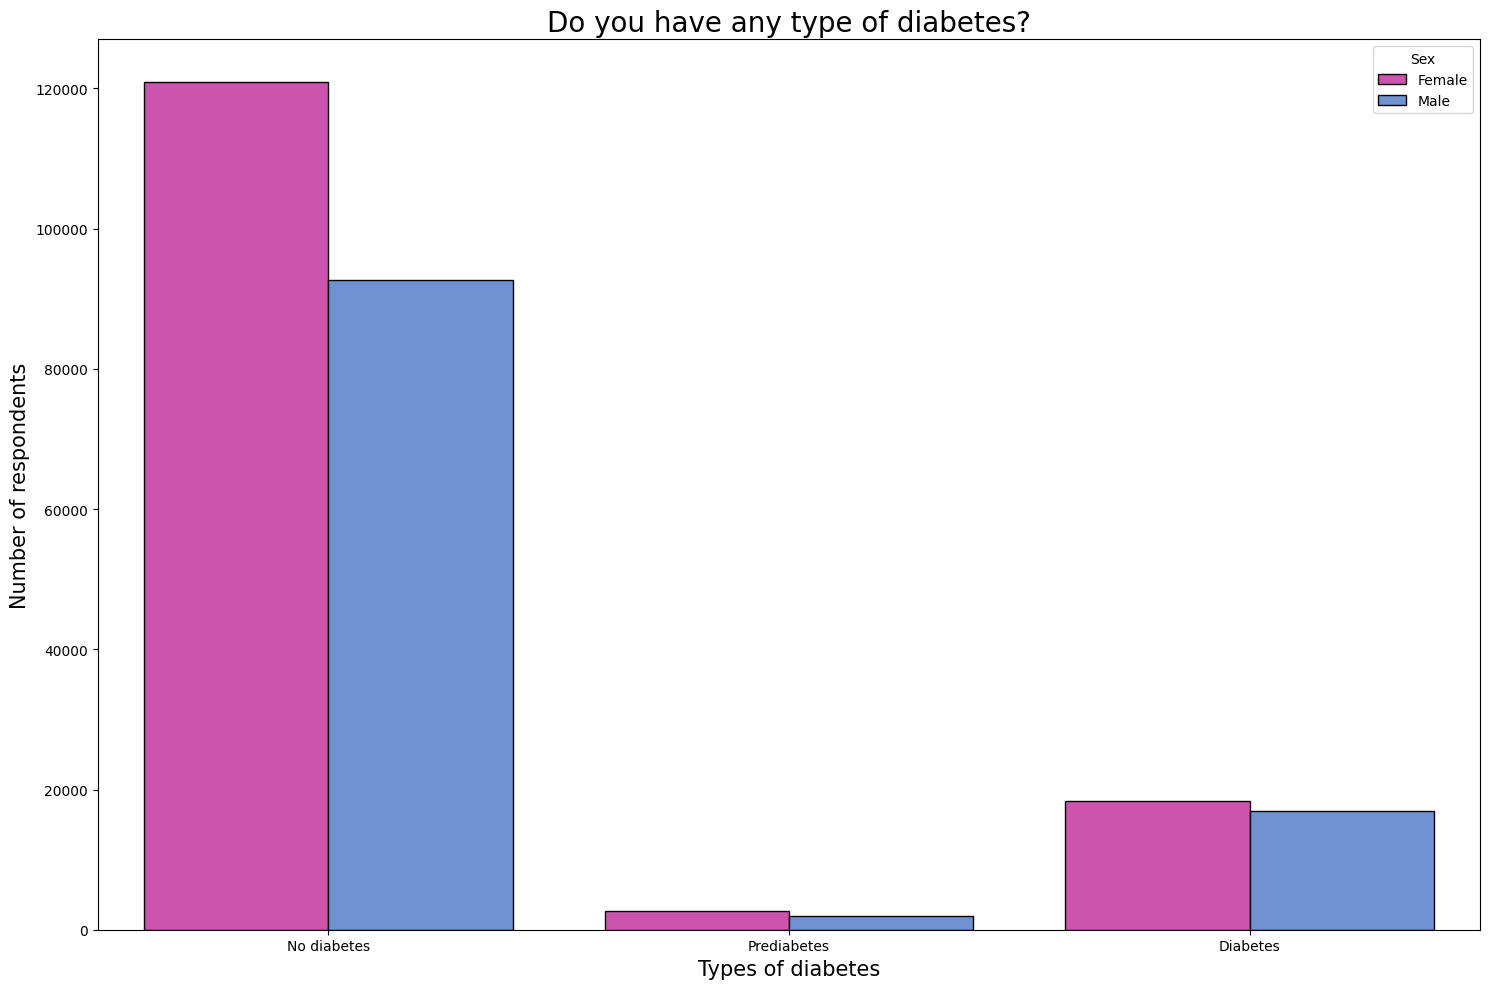

In [24]:
values_diabetes_order = ['No diabetes',
                         'Prediabetes',
                         'Diabetes']
values_sex_order = ['Female', 'Male']
titles = ["Respondents who don't have diabetes",
          "Respondents who have prediabetes",
          "Respondents who have diabetes"]

f, m = sex_metrics(df, 'Sex', 'Diabetes_012', values_sex_order, values_diabetes_order)

for title, value in zip(titles, values_diabetes_order):
    display(Markdown(f"### **{title}**"))
    show_metric("Total", round(f[value] + m[value], 2))
    show_metric("Women", f[value])
    show_metric("Men", m[value])

group = df.groupby(['Sex', 'Diabetes_012']).size().reset_index(name='count')

g_title = "Do you have any type of diabetes?"
x_label = "Types of diabetes"
y_label = "Number of respondents"
dict_colors = {'Female':'#E03FB8',
               'Male': '#608DE0'}
colors = list(dict_colors.values())

graph_diabetes = Graph(graph_title=g_title,
                       xlabel_name=x_label,
                       ylabel_name=y_label,
                       colors=colors)

graph_diabetes.bar_plot_sns(x='Diabetes_012', y='count', data=group, hue='Sex', hue_order=values_sex_order, order=values_diabetes_order, legend=True)


Analysis of the data on the incidence of diabetes in the respondents, considering their gender, allows the following findings to be extracted:

**People who do not have diabetes**.

The majority of respondents (**84.24%**) do not report having diabetes. When broken down by gender, females represent **47.68%** and males **36.56%**, showing that females are the majority within this group.

**People who have pre-diabetes**.

A **1.83%** of the respondents indicated having pre-diabetes. Of this total, **1.03%** were female, while males accounted for **0.8%**, showing a slight female prevalence of this condition.

**People with diabetes**

Of the total respondents, **13.94%** reported having diabetes. Of this total, **7.26%** were female, while males accounted for **6.68%**, showing a slight female prevalence of this condition.

**Trend analysis**

The higher prevalence of eported cases whitout diabetes among the respondents is a relevant finding that could be associated with biases in data collection. However, the **13.94%** of people with diabetes suggests the need for monitoring and prevention, as this condition is a risk factor for developing diabetes in the future.

### **Respondents who don't have diabetes**

Young: 2.21%

Young adulthood: 12.3%

Middle adulthood: 12.89%

Late adulthood: 19.25%

Old age: 37.6%

### **Respondents who have prediabetes**

Young: 0.01%

Young adulthood: 0.11%

Middle adulthood: 0.19%

Late adulthood: 0.38%

Old age: 1.14%

### **Respondents who have diabetes**

Young: 0.03%

Young adulthood: 0.43%

Middle adulthood: 1.1%

Late adulthood: 2.9%

Old age: 9.48%

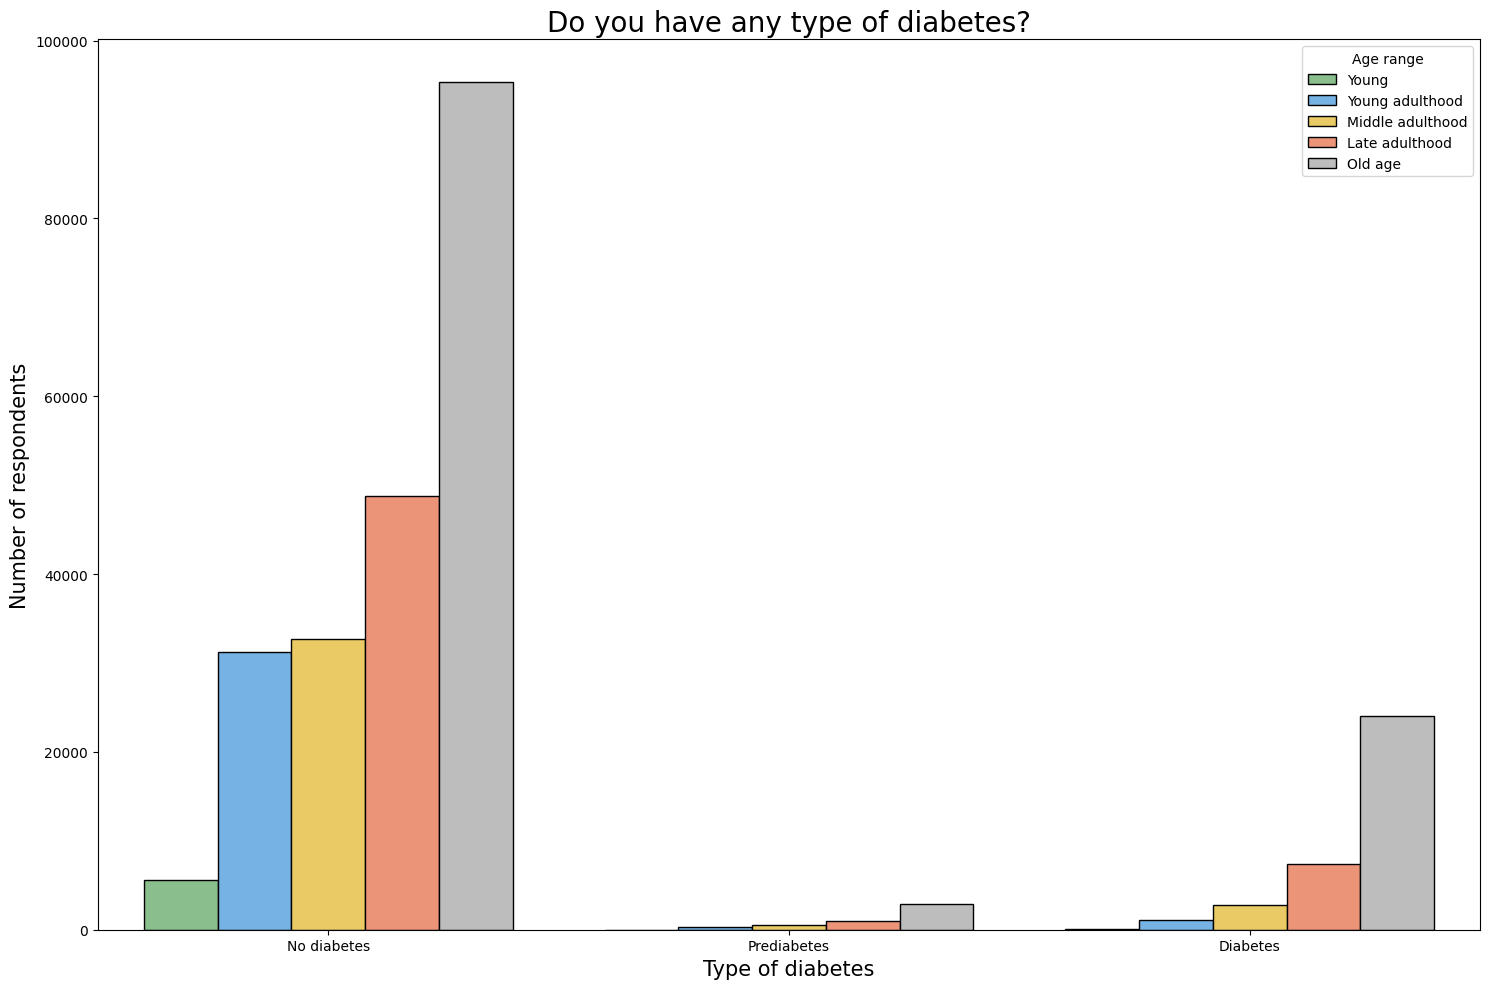

In [28]:
values_age_range_order = ['Young',
                          'Young adulthood',
                          'Middle adulthood',
                          'Late adulthood',
                          'Old age']
values_diabetes_order = ['No diabetes',
                         'Prediabetes',
                         'Diabetes']
titles = ["Respondents who don't have diabetes",
          "Respondents who have prediabetes",
          "Respondents who have diabetes"]

y, y_a, m_a, l_a, o_a = age_metrics(df, 'age_range', 'Diabetes_012', values_age_range_order, values_diabetes_order)

metrics_dict = {"Young": y,
                "Young adulthood": y_a,
                "Middle adulthood": m_a,
                "Late adulthood": l_a,
                "Old age": o_a}

for title, value in zip(titles, values_diabetes_order):
    display(Markdown(f"### **{title}**"))
    for metric in metrics_dict:
        show_metric(metric, metrics_dict[metric][value])

group = df.groupby(['age_range', 'Diabetes_012']).size().reset_index(name='count')
group.columns = ['Age range', 'Diabetes', 'count']

g_title = "Do you have any type of diabetes?"
x_label = "Type of diabetes"
y_label = "Number of respondents"
dict_colors = {"Young":"#81C784", 
               "Young adulthood":"#64B5F6", 
               "Middle adulthood":"#FFD54F", 
               "Late adulthood":"#FF8A65",
               "Old age":"#BDBDBD"}
colors = list(dict_colors.values())

graph_diabetes = Graph(graph_title=g_title,
                       xlabel_name=x_label,
                       ylabel_name=y_label,
                       colors=colors)

graph_diabetes.bar_plot_sns(x='Diabetes', y='count', data=group, hue='Age range', hue_order=values_age_range_order, order=values_diabetes_order, legend=True)

From the analysis of this graph which provides information about the type of diabetes the respondents have (taking into account their age) the following insights were obtained.

**People who do not have diabetes**

The highest proportion of respondents without diabetes is in the ‘Old age’ category (**38.74%**), reflecting that this group has the highest representation. This is followed by ‘Late Adulthood’ with **19.63%**, and then the categories ‘Middle Adulthood’ and ‘Young Adulthood’, whose percentage values are not far apart (**13.08%** and **12.4%**, respectively).

The group ‘Young adulthood’ has the lowest representation with **2.22%**, which could be explained by the low incidence of chronic diseases such as diabetes at young ages.

**People who have pre-diabetes**.

The ‘Old age’ category also leads this group with **1.14%**, which indicates that the elderly not only have a higher proportion in the sample, but also shows us that this age group is more likely to suffer from this condition.

The ‘Late Adulthood’ (**0.38%**) and ‘Middle Adulthood’ (**0.19%**) groups have lower, but still relevant values.

The younger groups, ‘Young adulthood’ (**0.11**%) and ‘Youth’ (**0.01**%), represent a smaller share of the total set, confirming the lower incidence of this condition earlier in life.

**People with diabetes**

‘Old age’ is confirmed as the most significant risk factor for this condition, representing almost **10%** of the cases.

The ‘Late Adulthood’ (**2.9**%) and ‘Middle Adulthood’ (**1.1**%) groups have lower but still relevant values.

The youngest groups, ‘Young adulthood’ (**0.43**%) and ‘Youth’ (**0.03**%), represent a smaller share of the total set, confirming the lower incidence of this condition in earlier stages of life.

**Trend analysis**

As age increases, so does the likelihood of having pre-diabetes in the surveyed population. This suggests that ageing is an important risk factor for developing this condition.

### **Respondents who suffered a stroke**

Total: 4.06%

Women: 2.24%

Men: 1.82%

### **Respondents who didn't suffer a stroke**

Total: 95.94%

Women: 53.72%

Men: 42.22%

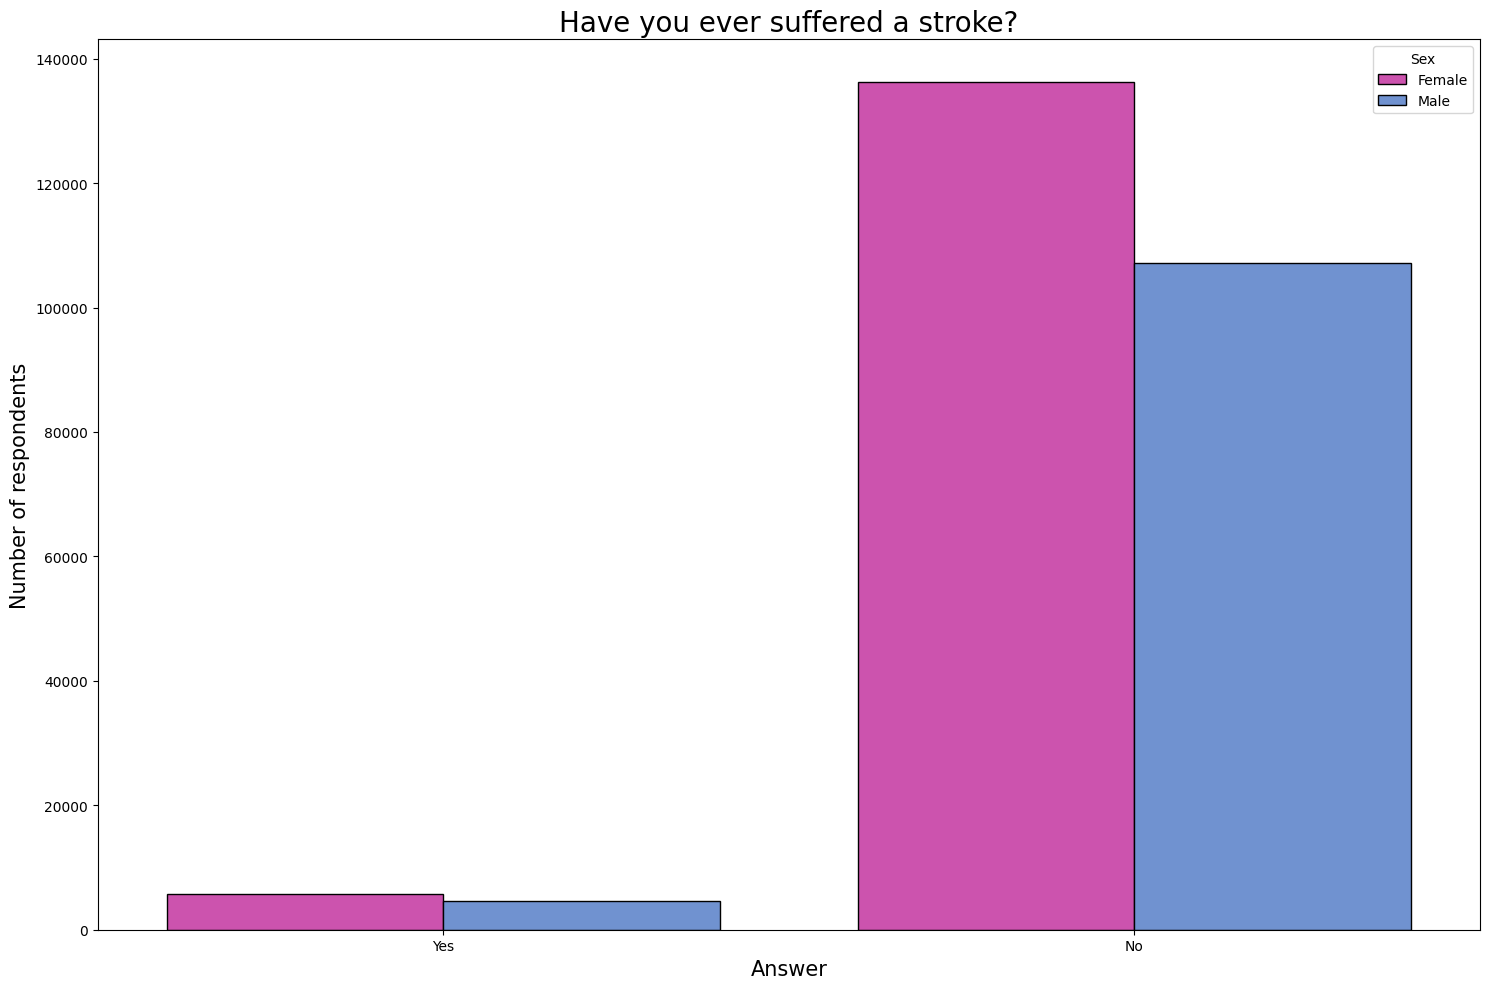

In [30]:
values_stroke_order = ['Yes', 'No']
values_sex_order = ['Female', 'Male']
titles = ["Respondents who suffered a stroke",
          "Respondents who didn't suffer a stroke"]

f, m = sex_metrics(df, 'Sex', 'Stroke', values_sex_order, values_stroke_order)

for title, value in zip(titles, values_stroke_order):
    display(Markdown(f"### **{title}**"))
    show_metric("Total", round(f[value] + m[value], 2))
    show_metric("Women", f[value])
    show_metric("Men", m[value])

group = df.groupby(['Sex', 'Stroke']).size().reset_index(name='count')

g_title = "Have you ever suffered a stroke?"
x_label = "Answer"
y_label = "Number of respondents"
dict_colors = {'Female':'#E03FB8',
               'Male': '#608DE0'}
colors = list(dict_colors.values())

graph_diabetes = Graph(graph_title=g_title,
                       xlabel_name=x_label,
                       ylabel_name=y_label,
                       colors=colors)

graph_diabetes.bar_plot_sns(x='Stroke', y='count', data=group, hue='Sex', hue_order=values_sex_order, order=values_stroke_order, legend=True)




Analysis of the data related to respondents who have suffered a stroke allows for the identification of patterns associated with this critical health event. The distribution of cases is analysed taking into account the sex of the respondents, giving a clearer picture of the proportions within the survey population.

**Respondents who suffered a stroke**

This group represents **4.06%** of all respondents. Within this category, women make up **2.24%**, while men account for **1.82%**. Although the percentages are relatively low, it is evident that women are slightly predominant in the reported cases.

**Respondents who did not have a stroke**

The majority of respondents, equivalent to **95.94%**, did not report ever having suffered a stroke. Of this group, **53.72%** are female and **42.22%** are male, reflecting a higher female representation among those who have not faced this health condition.

**Trend analysis**

It is notable that stroke cases are significantly lower compared to those who have not had a stroke, which is possitive. However, within the affected group, women show a slightly higher proportion. This could be associated with specific demographic, biological or habit factors that merit further analysis. On the other hand, the predominance of women in both affected and unaffected groups suggests a higher representation of this gender in the sample, which could be related to possible biases in data collection or to demographic factors in the population studied.

### **Respondents who suffered a stroke**

Young: 0.01%

Young adulthood: 0.1%

Middle adulthood: 0.24%

Late adulthood: 0.71%

Old age: 3.0%

### **Respondents who didn't suffer a stroke**

Young: 2.24%

Young adulthood: 12.73%

Middle adulthood: 13.95%

Late adulthood: 21.81%

Old age: 45.21%

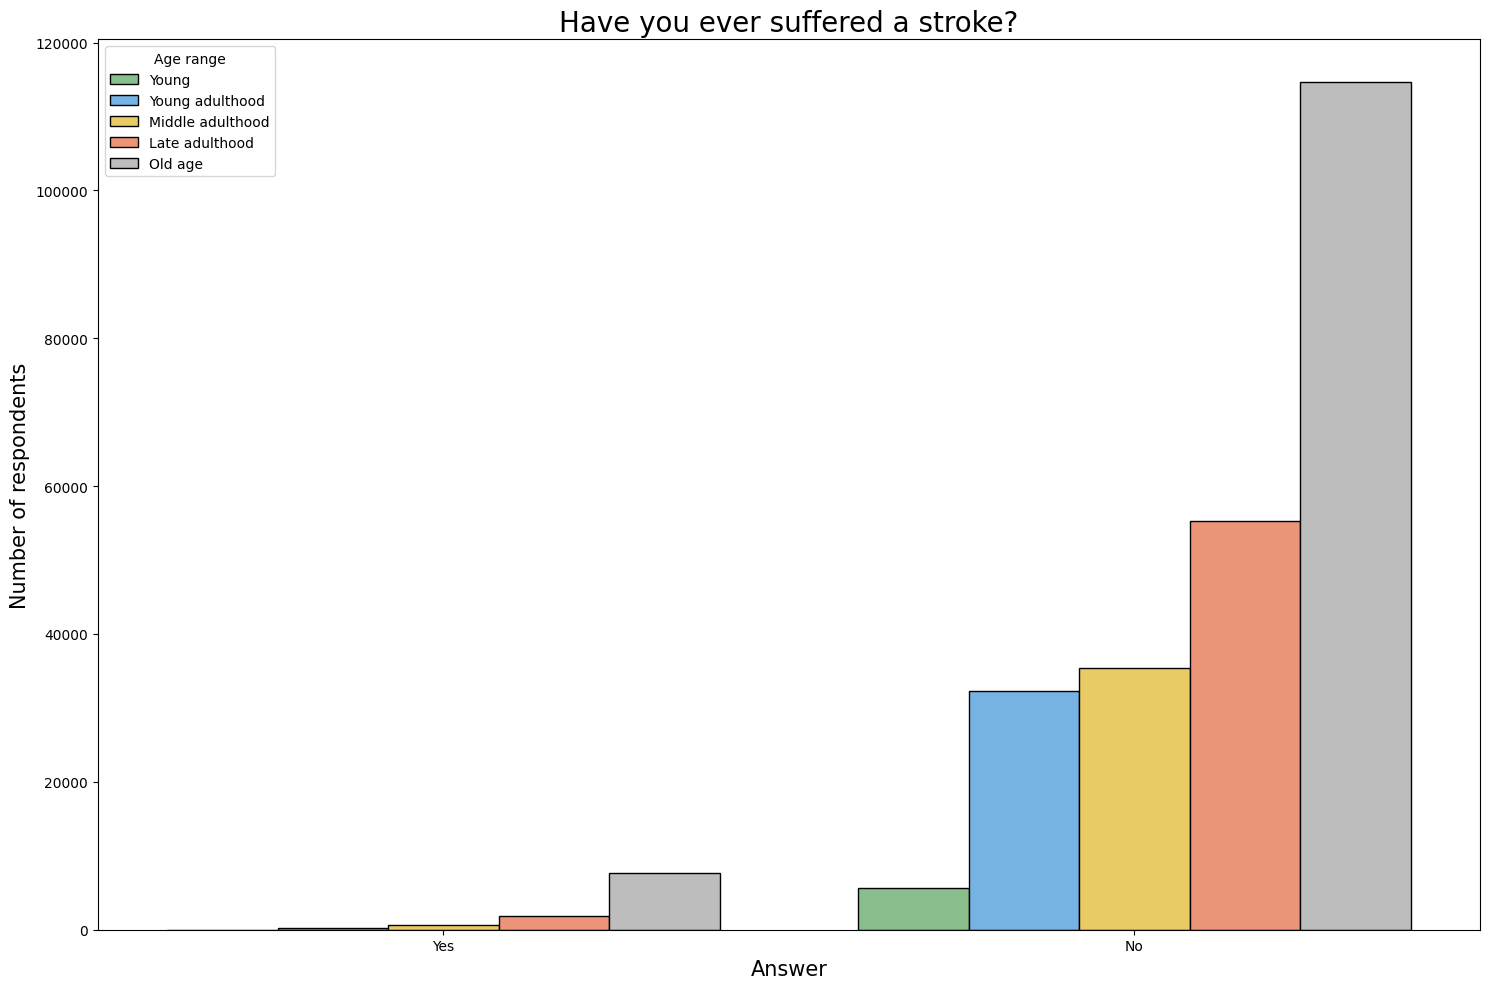

In [33]:
values_age_range_order = ['Young',
                          'Young adulthood',
                          'Middle adulthood',
                          'Late adulthood',
                          'Old age']
values_stroke_order = ['Yes', 'No']
titles = ["Respondents who suffered a stroke",
          "Respondents who didn't suffer a stroke"]

y, y_a, m_a, l_a, o_a = age_metrics(df, 'age_range', 'Stroke', values_age_range_order, values_stroke_order)

metrics_dict = {"Young": y,
                "Young adulthood": y_a,
                "Middle adulthood": m_a,
                "Late adulthood": l_a,
                "Old age": o_a}

for title, value in zip(titles, values_stroke_order):
    display(Markdown(f"### **{title}**"))
    for metric in metrics_dict:
        show_metric(metric, metrics_dict[metric][value])

group = df.groupby(['age_range', 'Stroke']).size().reset_index(name='count')
group.columns = ['Age range', 'Stroke', 'count']

g_title = "Have you ever suffered a stroke?"
x_label = "Answer"
y_label = "Number of respondents"
dict_colors = {"Young":"#81C784", 
               "Young adulthood":"#64B5F6", 
               "Middle adulthood":"#FFD54F", 
               "Late adulthood":"#FF8A65",
               "Old age":"#BDBDBD"}
colors = list(dict_colors.values())

graph_diabetes = Graph(graph_title=g_title,
                       xlabel_name=x_label,
                       ylabel_name=y_label,
                       colors=colors)

graph_diabetes.bar_plot_sns(x='Stroke', y='count', data=group, hue='Age range', hue_order=values_age_range_order, order=values_stroke_order, legend=True)

The analysis of stroke occurrence among respondents, segmented by age group, provides valuable insights into the distribution of this health condition. Examining the data reveals trends in the prevalence of strokes and their correlation with age, offering critical information for public health strategies.

**Respondents who suffered a stroke**

This group represents a small portion of the population, with the majority of cases concentrated in older age groups. Among those who suffered a stroke:

* Young respondents account for **0.01%**.
* Young adulthood shows a slight increase, with **0.1%**.
* Middle adulthood contributes **0.24%**.
* Late adulthood sees a notable rise, with **0.71%**.
* Old age dominates this category, comprising **3.0%** of the respondents.

**Respondents who didn’t suffer a stroke**

A substantial majority of the population, spanning all age groups, did not report experiencing a stroke:

* Young respondents account for **2.24%**.
* Young adulthood constitutes **12.73%**.
* Middle adulthood contributes **13.95%**.
* Late adulthood rises to **21.81%**.
* Old age represents the largest proportion, at **45.21%**.

**Trend analysis**

The data clearly highlights a strong correlation between age and stroke occurrence. As individuals age, the probability of experiencing a stroke significantly increases, with the old age category accounting for the majority of cases. On the other hand, younger age groups show a trivial occurrence of strokes, suggesting that age is a key risk factor.

In contrast, the distribution of respondents who didn’t suffer a stroke is also age-dependent, with a higher proportion in the old age and late adulthood categories. Understanding these patterns emphasizes the importance of targeting older populations with preventive measures and awareness campaigns to reduce stroke risk and improve long-term health outcomes.

### **Respondents who have high cholesterol**

Total: 42.41%

Women: 22.97%

Men: 19.44%

### **Respondents who don't have high cholesterol**

Total: 57.59%

Women: 33.0%

Men: 24.59%

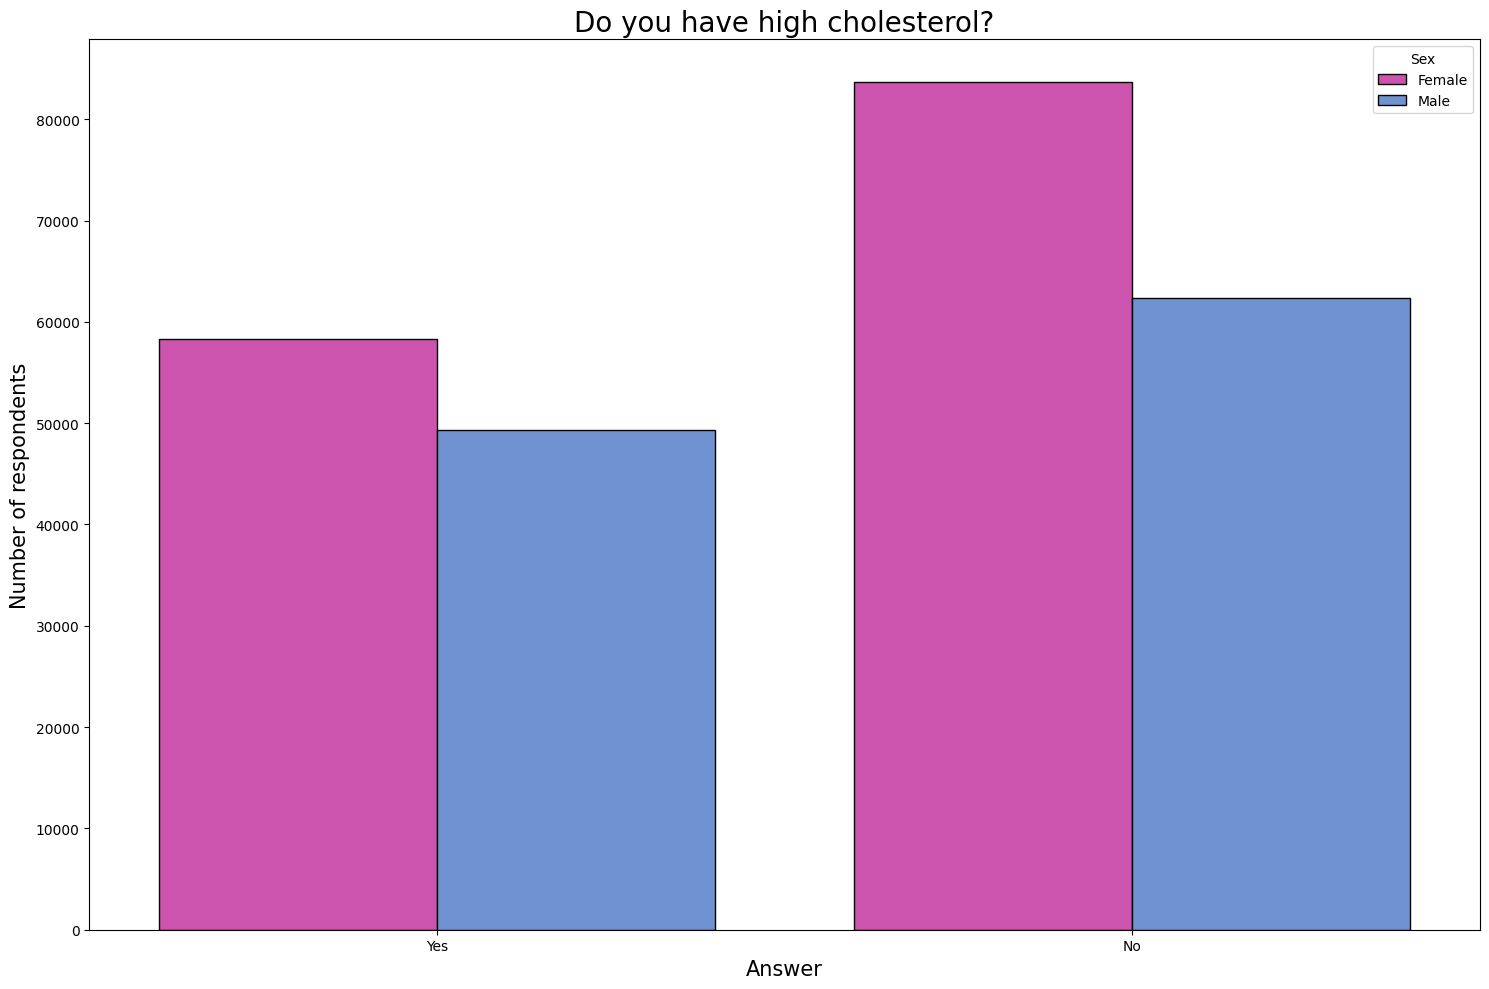

In [32]:
values_hc_order = ['Yes', 'No']
values_sex_order = ['Female', 'Male']
titles = ["Respondents who have high cholesterol",
          "Respondents who don't have high cholesterol"]

f, m = sex_metrics(df, 'Sex', 'HighChol', values_sex_order, values_hc_order)

for title, value in zip(titles, values_hc_order):
    display(Markdown(f"### **{title}**"))
    show_metric("Total", round(f[value] + m[value], 2))
    show_metric("Women", f[value])
    show_metric("Men", m[value])

group = df.groupby(['Sex', 'HighChol']).size().reset_index(name='count')

g_title = "Do you have high cholesterol?"
x_label = "Answer"
y_label = "Number of respondents"
dict_colors = {'Female':'#E03FB8',
               'Male': '#608DE0'}
colors = list(dict_colors.values())

graph_diabetes = Graph(graph_title=g_title,
                       xlabel_name=x_label,
                       ylabel_name=y_label,
                       colors=colors)

graph_diabetes.bar_plot_sns(x='HighChol', y='count', data=group, hue='Sex', hue_order=values_sex_order, order=values_hc_order, legend=True)


After analysing this graph, which classifies respondents into two groups according to their gender and whether they have high cholesterol or not, the following findings were obtained:

**People who have high cholesterol**

This group represents **42.41%** of the total respondents. When divided by gender, **22.97%** are women and **19.44%** are men. This indicates that within this group, women are in the majority.

**People who do not have high cholesterol**

This group constitutes **57.59%** of the total number of respondents, which is encouraging, as it indicates that the majority of respondents do not have high cholesterol.
Within this group, **33.0%** were female and **24.59%** were male, again reflecting a greater presence of female respondents.

**Trend analysis**

From the data analysed, a bias towards the female public is observed, as the proportion of women is higher in both groups.

### **Respondents who have high cholesterol**

Young: 0.2%

Young adulthood: 2.26%

Middle adulthood: 4.28%

Late adulthood: 9.57%

Old age: 26.11%

### **Respondents who don't have high cholesterol**

Young: 2.05%

Young adulthood: 10.57%

Middle adulthood: 9.9%

Late adulthood: 12.96%

Old age: 22.1%

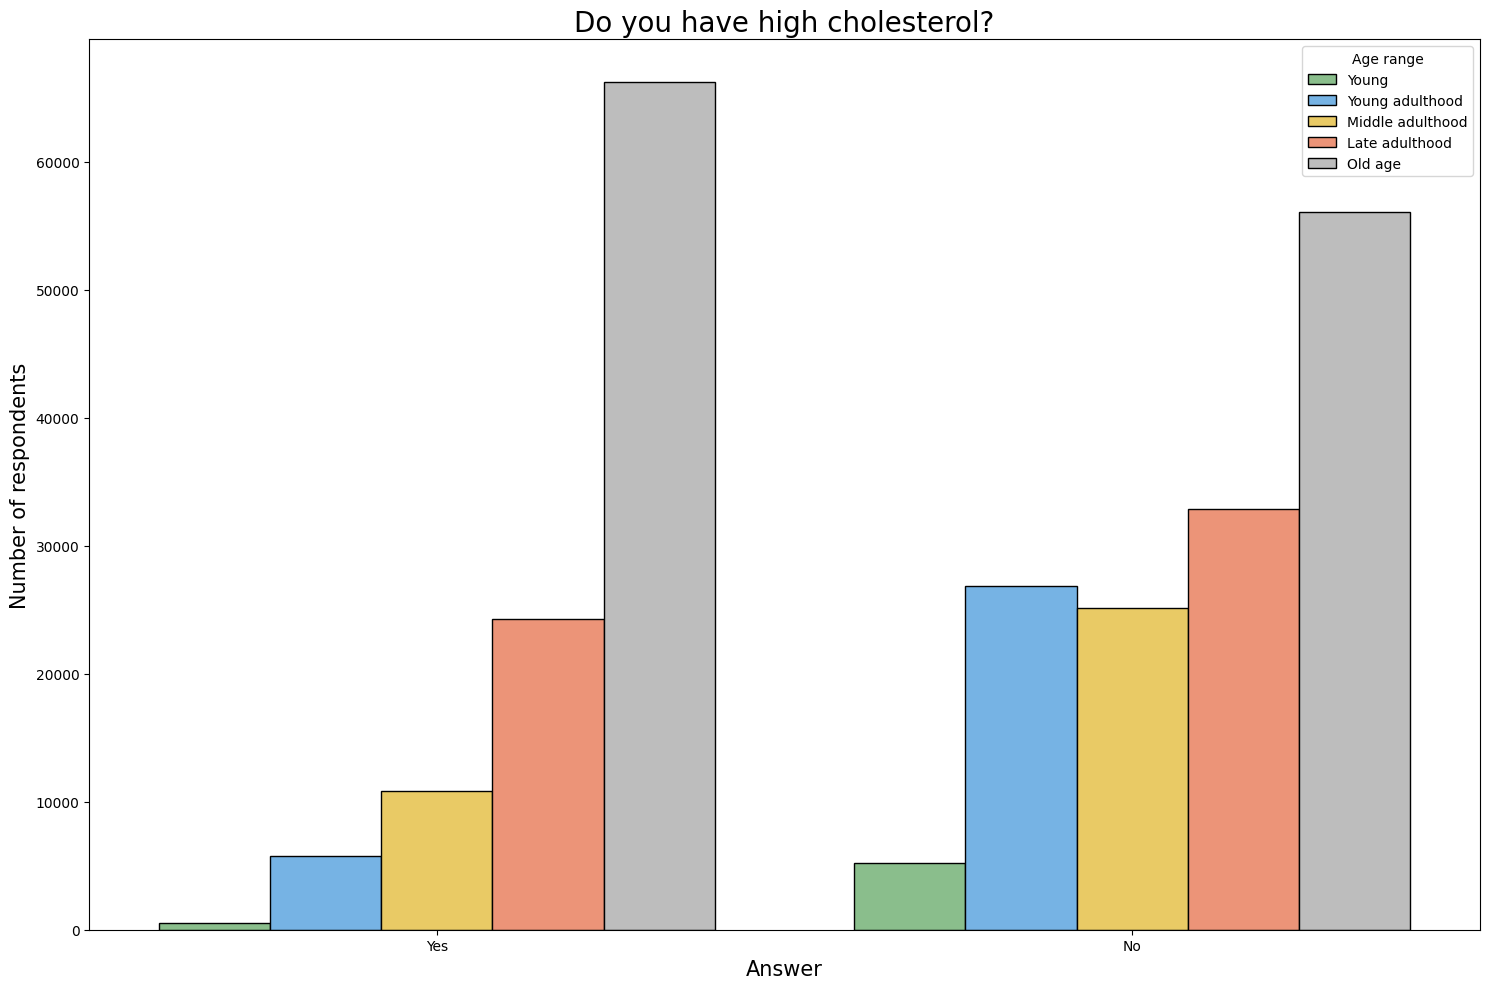

In [34]:
values_age_range_order = ['Young',
                          'Young adulthood',
                          'Middle adulthood',
                          'Late adulthood',
                          'Old age']
values_hc_order = ['Yes', 'No']
titles = ["Respondents who have high cholesterol",
          "Respondents who don't have high cholesterol"]

y, y_a, m_a, l_a, o_a = age_metrics(df, 'age_range', 'HighChol', values_age_range_order, values_hc_order)

metrics_dict = {"Young": y,
                "Young adulthood": y_a,
                "Middle adulthood": m_a,
                "Late adulthood": l_a,
                "Old age": o_a}

for title, value in zip(titles, values_hc_order):
    display(Markdown(f"### **{title}**"))
    for metric in metrics_dict:
        show_metric(metric, metrics_dict[metric][value])

group = df.groupby(['age_range', 'HighChol']).size().reset_index(name='count')
group.columns = ['Age range', 'HighChol', 'count']

g_title = "Do you have high cholesterol?"
x_label = "Answer"
y_label = "Number of respondents"
dict_colors = {"Young":"#81C784", 
               "Young adulthood":"#64B5F6", 
               "Middle adulthood":"#FFD54F", 
               "Late adulthood":"#FF8A65",
               "Old age":"#BDBDBD"}
colors = list(dict_colors.values())

graph_diabetes = Graph(graph_title=g_title,
                       xlabel_name=x_label,
                       ylabel_name=y_label,
                       colors=colors)

graph_diabetes.bar_plot_sns(x='HighChol', y='count', data=group, hue='Age range', hue_order=values_age_range_order, order=values_hc_order, legend=True)

From the analysis of the data obtained on the presence of high cholesterol in the respondents, according to their age, the following insights were derived.

**People with high cholesterol**

The ‘Old age’ category has the highest proportion of people with high cholesterol, reaching **26.11%**, which reflects that, in this age group, the likelihood of having high cholesterol is significantly high. This is followed by the ‘Late Adulthood’ group with **9.57%**, also showing that older people are prone to high cholesterol. In the groups ‘Middle Adulthood’ (**4.28%**) and ‘Young Adulthood’ (**2.26%**), the proportion is lower, but still relevant compared to the younger ones.

The ‘Young’ group has the lowest representation with **0.2%**, which could be explained by the low incidence of high cholesterol in young people, who generally have a healthier lifestyle.

**People without high cholesterol**

In contrast, in the group without high cholesterol, the ‘Young’ category is represented by **2.05%** of the total, followed by ‘Middle age’ with **9.9%**.

The groups ‘Young adulthood’ (**10.57%**) and ‘Late adulthood’ (**12.96%**) also have significant proportions of people without high cholesterol.

Finally, the ‘Old age’ group has **22.1%** without high cholesterol, which may indicate that, despite the high prevalence of high cholesterol in this group, there is also a considerable proportion who do not have this condition, possibly due to genetic factors or healthy lifestyles maintained in old age.

**Trend analysis**

One clear trend to note is that as age increases, so does the likelihood of high cholesterol. This insight highlights that ageing is a relevant factor in the development of high cholesterol, and highlights the importance of adopting healthy habits from an early age to mitigate the risk of cardiovascular conditions in the future.

### **Respondents who have high blood pressure**

Total: 42.9%

Women: 22.73%

Men: 20.17%

### **Respondents who don't have high blood pressure**

Total: 57.1%

Women: 33.24%

Men: 23.86%

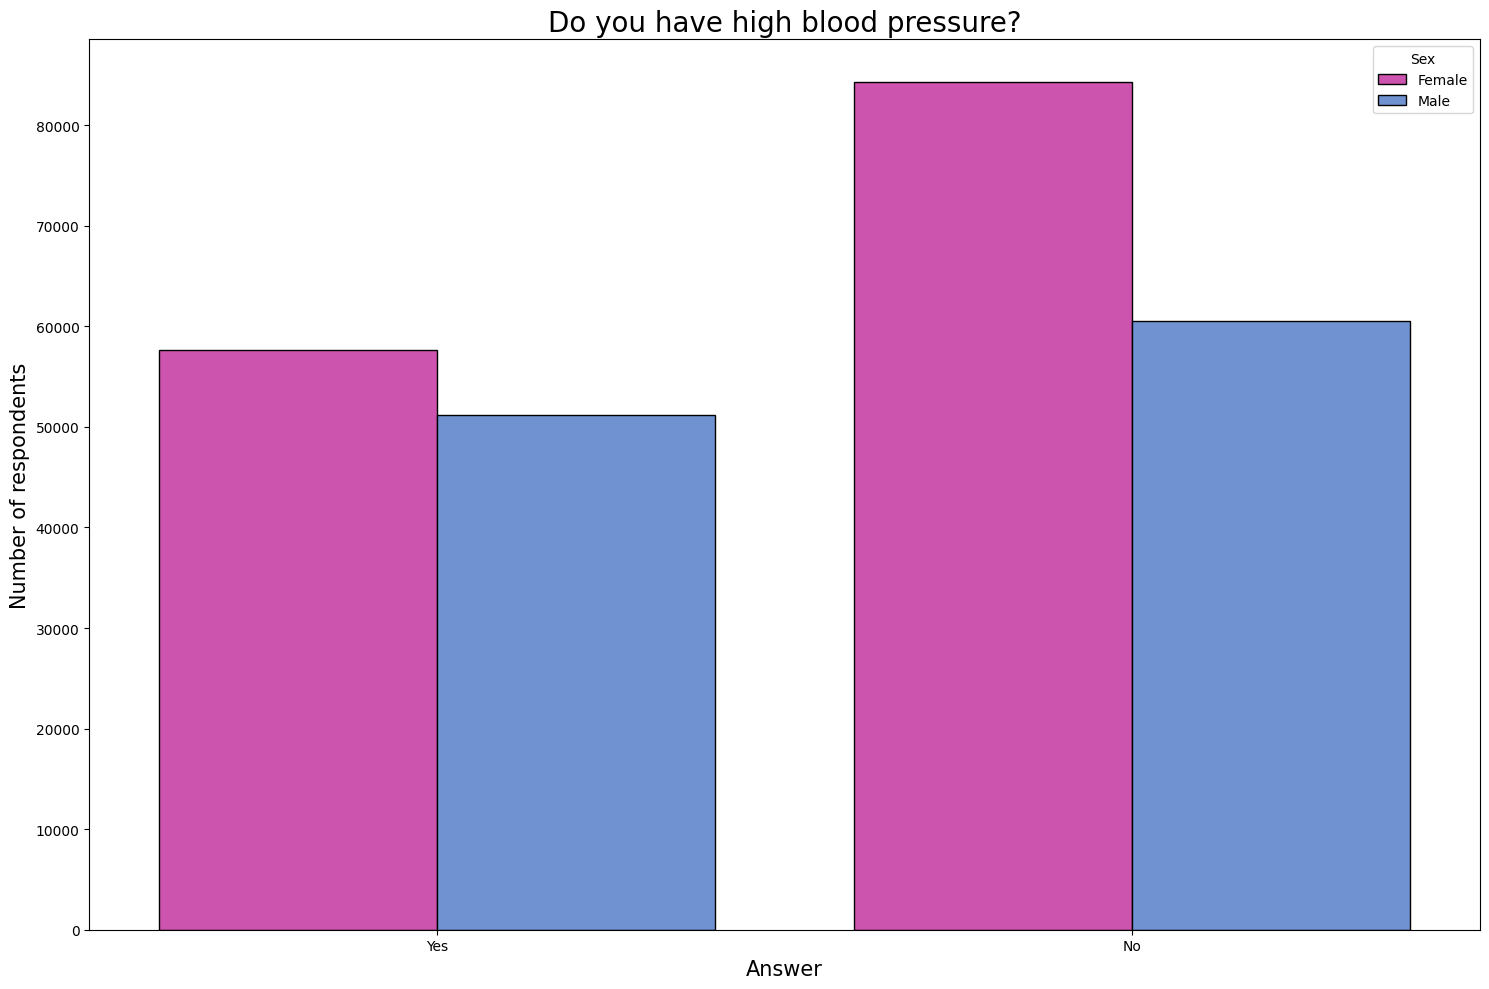

In [35]:
values_hbp_order = ['Yes', 'No']
values_sex_order = ['Female', 'Male']
titles = ["Respondents who have high blood pressure",
          "Respondents who don't have high blood pressure"]

f, m = sex_metrics(df, 'Sex', 'HighBP', values_sex_order, values_hbp_order)

for title, value in zip(titles, values_hbp_order):
    display(Markdown(f"### **{title}**"))
    show_metric("Total", round(f[value] + m[value], 2))
    show_metric("Women", f[value])
    show_metric("Men", m[value])

group = df.groupby(['Sex', 'HighBP']).size().reset_index(name='count')

g_title = "Do you have high blood pressure?"
x_label = "Answer"
y_label = "Number of respondents"
dict_colors = {'Female':'#E03FB8',
               'Male': '#608DE0'}
colors = list(dict_colors.values())

graph_diabetes = Graph(graph_title=g_title,
                       xlabel_name=x_label,
                       ylabel_name=y_label,
                       colors=colors)

graph_diabetes.bar_plot_sns(x='HighBP', y='count', data=group, hue='Sex', hue_order=values_sex_order, order=values_hbp_order, legend=True)

The prevalence of hypertension, analysed by gender, highlights the importance of identifying patterns associated with this condition. This analysis provides valuable insights for designing strategies to promote cardiovascular health.

**Respondents who have high blood pressure**

This group accounts for a significant portion of the population, with notable representation across genders:

* Total: **42.9%**
* Women: **22.73%**
* Men: **20.17%**

**Respondents who don't have high blood pressure**

A slightly larger proportion of respondents fall into this category, suggesting that over half of the population does not experience hypertension:

* Total: **57.1%**
* Women: **33.24%**
* Men: **23.86%**

**Trend analysis**

The data reveals that women slightly outnumber men in both categories, highlighting a higher prevalence of high blood pressure among women in this dataset. This pattern may indicate a clear data's bias.

Despite the significant proportion of respondents with high blood pressure (**42.9%**), it is encouraging to note that the majority (**57.1%**) do not have the disease. However, the relatively high prevalence of hypertension underlines the importance of public health initiatives aimed at early detection and lifestyle interventions, such as promoting regular physical activity, reducing sodium intake and controlling stress levels.

### **Respondents who have high blood pressure**

Young: 0.19%

Young adulthood: 2.0%

Middle adulthood: 3.74%

Late adulthood: 8.95%

Old age: 28.01%

### **Respondents who don't have high blood pressure**

Young: 2.05%

Young adulthood: 10.82%

Middle adulthood: 10.45%

Late adulthood: 13.58%

Old age: 20.2%

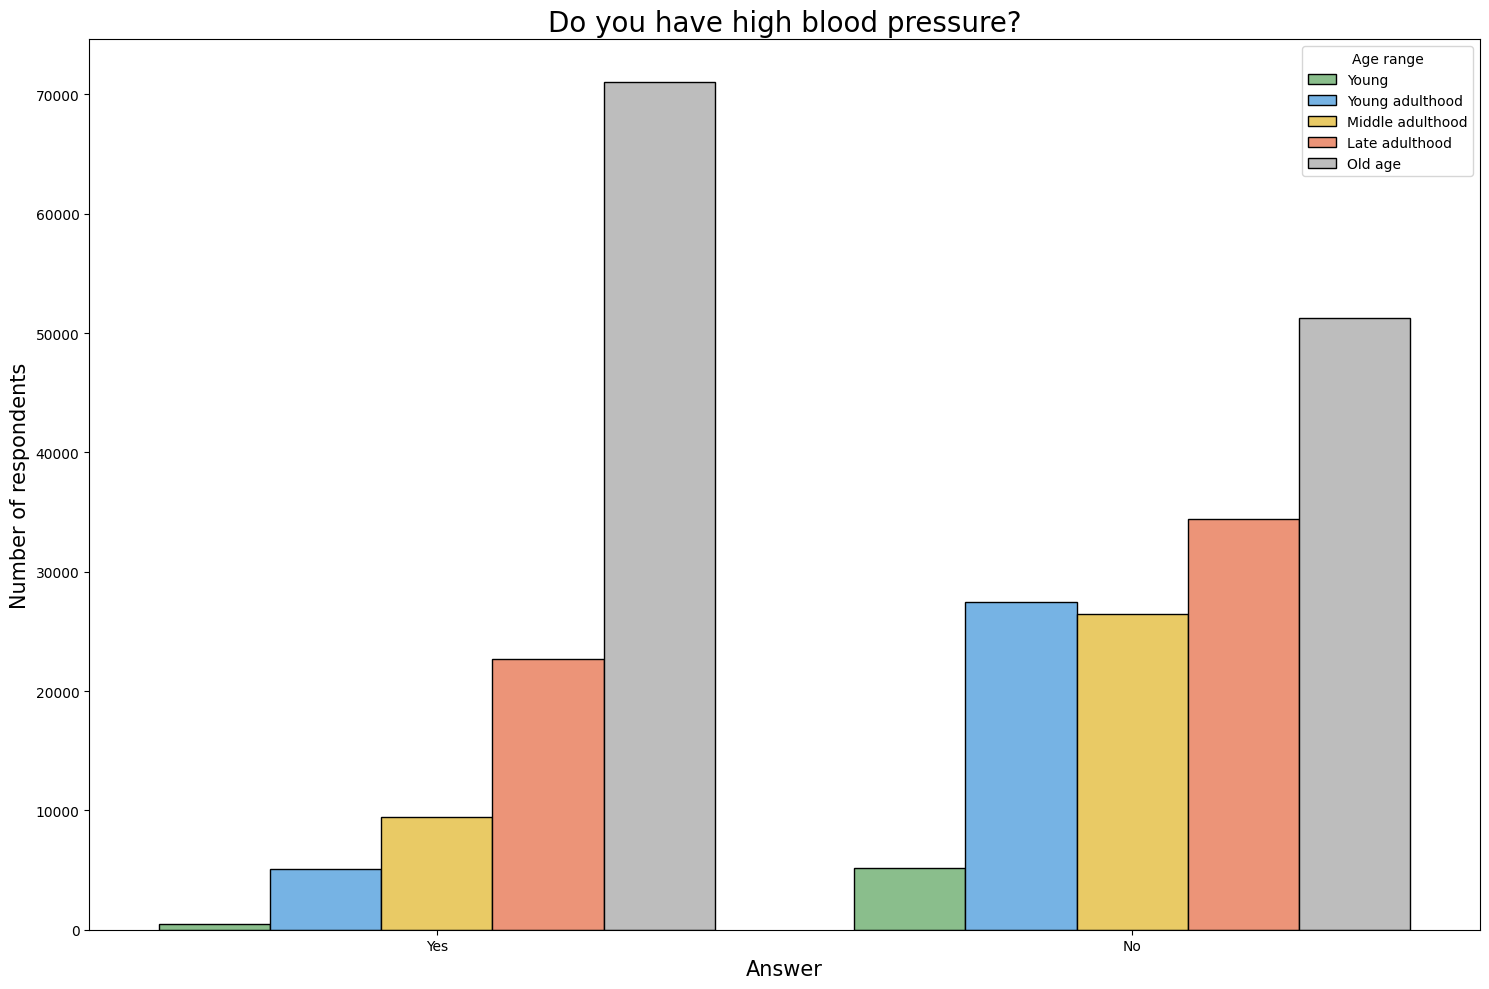

In [36]:
values_age_range_order = ['Young',
                          'Young adulthood',
                          'Middle adulthood',
                          'Late adulthood',
                          'Old age']
values_hbp_order = ['Yes', 'No']
titles = ["Respondents who have high blood pressure",
          "Respondents who don't have high blood pressure"]

y, y_a, m_a, l_a, o_a = age_metrics(df, 'age_range', 'HighBP', values_age_range_order, values_hbp_order)

metrics_dict = {"Young": y,
                "Young adulthood": y_a,
                "Middle adulthood": m_a,
                "Late adulthood": l_a,
                "Old age": o_a}

for title, value in zip(titles, values_hbp_order):
    display(Markdown(f"### **{title}**"))
    for metric in metrics_dict:
        show_metric(metric, metrics_dict[metric][value])

group = df.groupby(['age_range', 'HighBP']).size().reset_index(name='count')
group.columns = ['Age range', 'HighBP', 'count']

g_title = "Do you have high blood pressure?"
x_label = "Answer"
y_label = "Number of respondents"
dict_colors = {"Young":"#81C784", 
               "Young adulthood":"#64B5F6", 
               "Middle adulthood":"#FFD54F", 
               "Late adulthood":"#FF8A65",
               "Old age":"#BDBDBD"}
colors = list(dict_colors.values())

graph_diabetes = Graph(graph_title=g_title,
                       xlabel_name=x_label,
                       ylabel_name=y_label,
                       colors=colors)

graph_diabetes.bar_plot_sns(x='HighBP', y='count', data=group, hue='Age range', hue_order=values_age_range_order, order=values_hbp_order, legend=True)

The prevalence of high blood pressure, analyzed by age groups, provides insights into how this condition varies across different life stages. Understanding these patterns can help to tailor preventive measures and interventions to specific age groups, addressing the factors that contribute to hypertension.

**Respondents who have high blood pressure**

High blood pressure becomes increasingly prevalent with age, indicating a clear trend of higher risk as individuals grow older:

* Young: **0.19%**
* Young adulthood: **2.0%**
* Middle adulthood: **3.74%**
* Late adulthood: **8.95%**
* Old age: **28.01%**

**Respondents who don't have high blood pressure**

A larger proportion of respondents in younger age groups do not have high blood pressure, but this proportion decreases steadily with age:

* Young: **2.05%**
* Young adulthood: **10.82%**
* Middle adulthood: **10.45%**
* Late adulthood: **13.58%**
* Old age: **20.2%**

**Trend analysis**

The data highlights a clear and consistent trend: high blood pressure becomes more prevalent with age. While only a small fraction of younger respondents (**0.19%** in the "Young" category) experience hypertension, the prevalence increases dramatically in "Old age," where it affects over a quarter of respondents (**28.01%**).

On the other hand, the percentage of respondents without high blood pressure diminishes with age, starting at **2.05%** in the "Young" category and dropping to **20.2%** in "Old age." This suggests that aging is a critical risk factor for developing high blood pressure.

These findings underscore the importance of early intervention, particularly in younger age groups, to mitigate the long-term risk of hypertension. Preventive strategies could include promoting healthy dietary habits, regular physical activity, and regular monitoring of blood pressure to identify and address issues before they escalate with age.

### **Respondents who have heart's problems**

Total: 9.42%

Women: 4.02%

Men: 5.4%

### **Respondents who don't have heart's problems**

Total: 90.58%

Women: 51.94%

Men: 38.64%

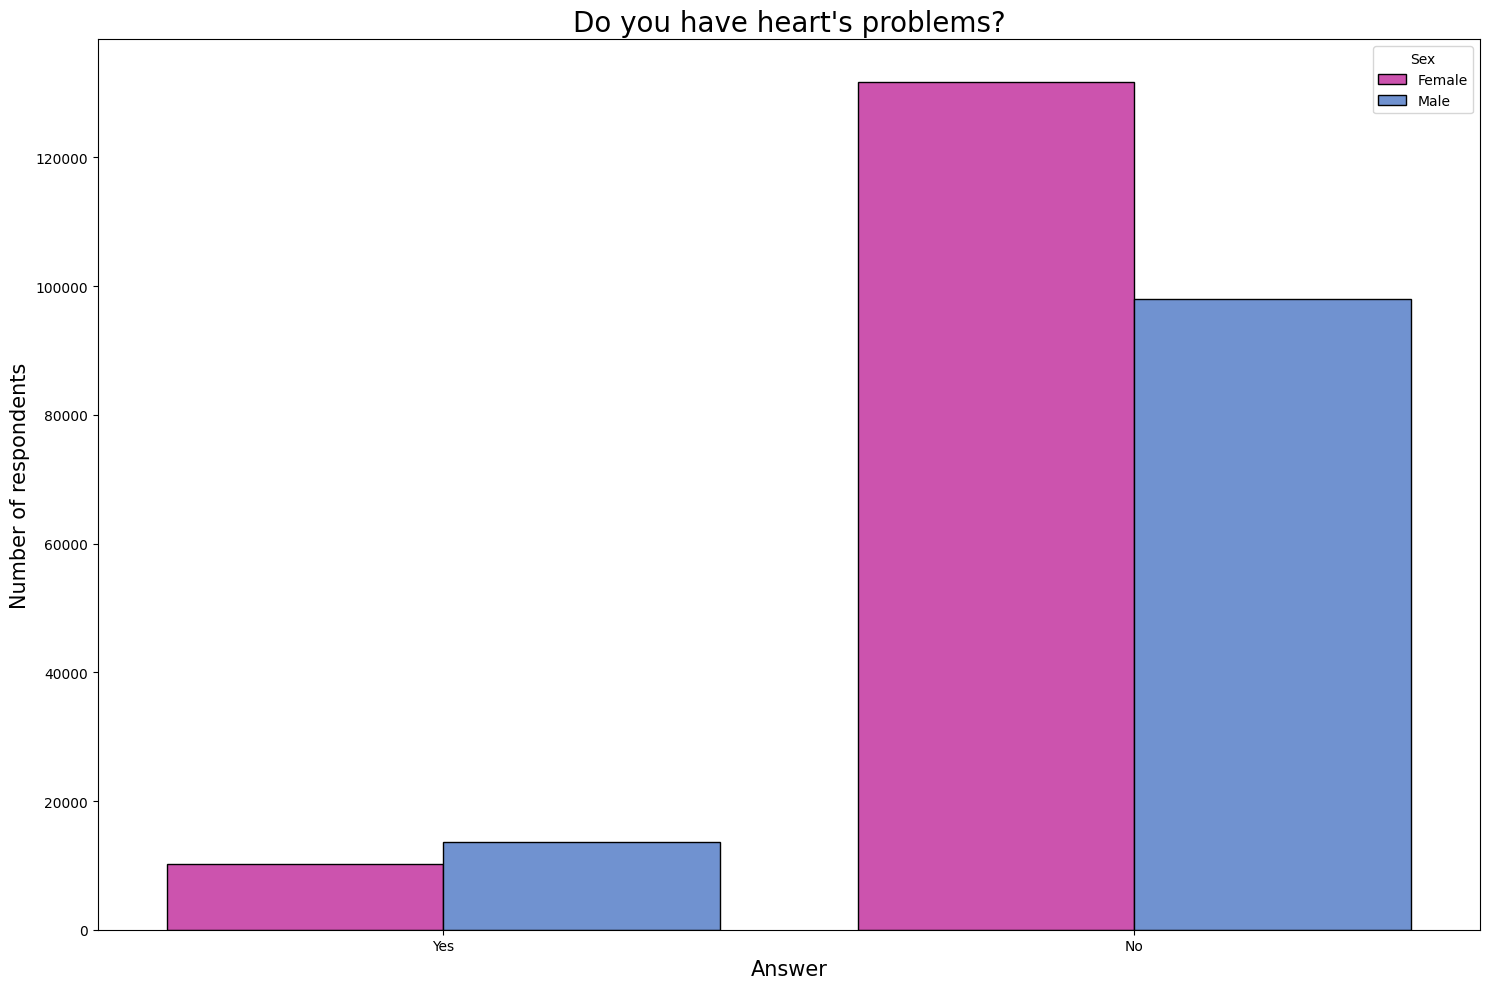

In [37]:
values_hda_order = ['Yes', 'No']
values_sex_order = ['Female', 'Male']
titles = ["Respondents who have heart's problems",
          "Respondents who don't have heart's problems"]

f, m = sex_metrics(df, 'Sex', 'HeartDiseaseorAttack', values_sex_order, values_hda_order)

for title, value in zip(titles, values_hda_order):
    display(Markdown(f"### **{title}**"))
    show_metric("Total", round(f[value] + m[value], 2))
    show_metric("Women", f[value])
    show_metric("Men", m[value])

group = df.groupby(['Sex', 'HeartDiseaseorAttack']).size().reset_index(name='count')

g_title = "Do you have a heart problem?"
x_label = "Answer"
y_label = "Number of respondents"
dict_colors = {'Female':'#E03FB8',
               'Male': '#608DE0'}
colors = list(dict_colors.values())

graph_diabetes = Graph(graph_title=g_title,
                       xlabel_name=x_label,
                       ylabel_name=y_label,
                       colors=colors)

graph_diabetes.bar_plot_sns(x='HeartDiseaseorAttack', y='count', data=group, hue='Sex', hue_order=values_sex_order, order=values_hda_order, legend=True)

After analysing this graph, which classifies respondents into two groups according to their gender and whether they have heart problems or not, the following findings were obtained:

**People who have heart problems**

This group represents **9.42%** of the total number of respondents. When divided by gender, **4.02%** are women and **5.4%** are men. This indicates that within this group, men are in the majority.

**People who do not have heart problems**

This group constitutes **90.58%** of the total number of respondents, which is positive, as it indicates that the majority of respondents do not suffer from heart problems.
Within this group, **51.94%** are female and **38.64%** are male, reflecting a larger female audience.

**Trend analysis**

From the data analysed, a bias towards the female audience is observed in the group of people without heart problems, as the proportion of women is significantly higher. However, in the group of people with heart problems, men predominate.

### **Respondents who have heart's problems**

Young: 0.01%

Young adulthood: 0.15%

Middle adulthood: 0.42%

Late adulthood: 1.45%

Old age: 7.39%

### **Respondents who don't have heart's problems**

Young: 2.24%

Young adulthood: 12.68%

Middle adulthood: 13.76%

Late adulthood: 21.08%

Old age: 40.82%

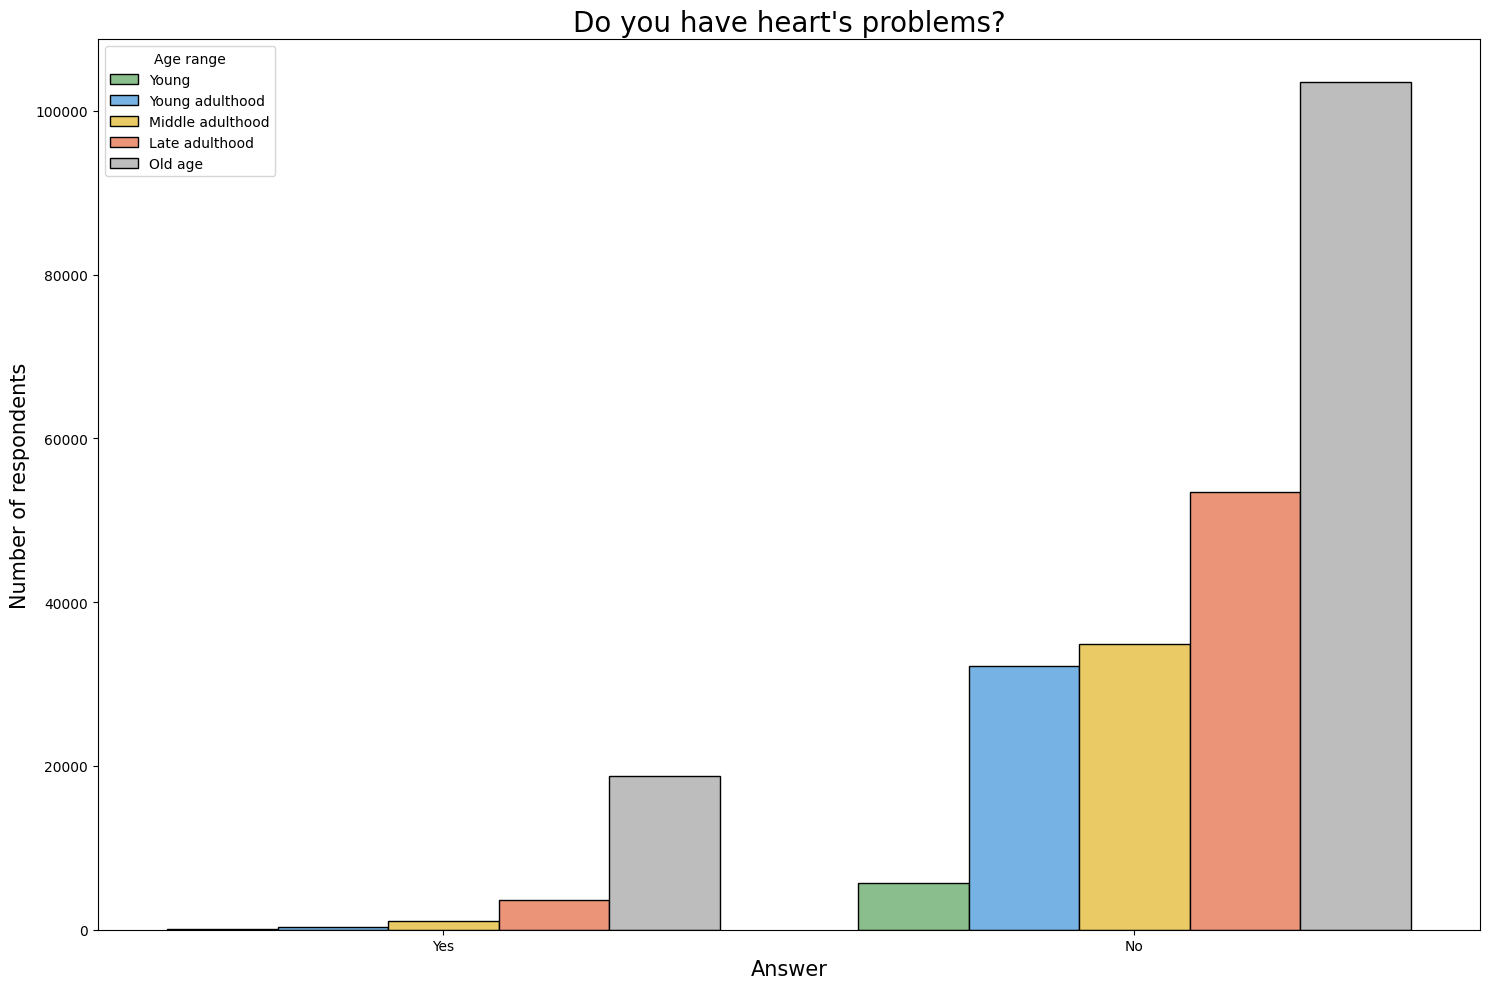

In [38]:
values_age_range_order = ['Young',
                          'Young adulthood',
                          'Middle adulthood',
                          'Late adulthood',
                          'Old age']
values_hda_order = ['Yes', 'No']
titles = ["Respondents who have heart's problems",
          "Respondents who don't have heart's problems"]

y, y_a, m_a, l_a, o_a = age_metrics(df, 'age_range', 'HeartDiseaseorAttack', values_age_range_order, values_hda_order)

metrics_dict = {"Young": y,
                "Young adulthood": y_a,
                "Middle adulthood": m_a,
                "Late adulthood": l_a,
                "Old age": o_a}

for title, value in zip(titles, values_hda_order):
    display(Markdown(f"### **{title}**"))
    for metric in metrics_dict:
        show_metric(metric, metrics_dict[metric][value])

group = df.groupby(['age_range', 'HeartDiseaseorAttack']).size().reset_index(name='count')
group.columns = ['Age range', 'HeartDiseaseorAttack', 'count']

g_title = "Do you have a heart problem?"
x_label = "Answer"
y_label = "Number of respondents"
dict_colors = {"Young":"#81C784", 
               "Young adulthood":"#64B5F6", 
               "Middle adulthood":"#FFD54F", 
               "Late adulthood":"#FF8A65",
               "Old age":"#BDBDBD"}
colors = list(dict_colors.values())

graph_diabetes = Graph(graph_title=g_title,
                       xlabel_name=x_label,
                       ylabel_name=y_label,
                       colors=colors)

graph_diabetes.bar_plot_sns(x='HeartDiseaseorAttack', y='count', data=group, hue='Age range', hue_order=values_age_range_order, order=values_hda_order, legend=True)

From the analysis of the data obtained about respondents with heart problems according to their age, the following insights were identified.

**People with heart problems**

The ‘Old age’ category concentrates the highest number of people with heart problems, with **7.39%**, reflecting that this age group has a significantly higher risk of having a heart-related problem. This is followed by the ‘Late Adulthood’ group with **1.45%**, thus maintaining a tendency to suffer from some type of problem with increasing age.

In the categories ‘Middle adulthood’ (**0.42%**) and ‘Young adulthood’ (**0.15%**), the values are significantly lower.

The ‘Young’ group represents **0.01%** of the total data, which may be associated with a low risk of heart problems at younger ages, generally related to better physical conditions.

**People without heart problems**

On the other hand, the majority of respondents without heart problems are concentrated in the older age groups, the main ones being ‘Late Adulthood’ (**21.08%**) and ‘Old age’ (**40.82%**). The metrics associated with the latter category indicate that, although this group has a high likelihood of cardiovascular problems, it also has a considerable proportion who do not.

Similar proportions are observed for the categories ‘Middle adulthood’ (**13.76%**) and ‘Young adulthood’ (**12.68%**).

The group ‘Young adulthood’ has the lowest representation with **2.24%**, as there is a lower incidence of cardiovascular problems in this age range.

**Trend analysis**

What is important to note is that as age increases, so does the proportion of people with heart problems, with the old age being the most affected group of people. However, it is important to note that, within this same age group and those closest to them, a significant proportion do not have heart problems, suggesting that, although age is a relevant risk factor, maintaining a healthy lifestyle can play a key role in preventing these conditions even later in life.

### **Respondents who have mobility difficulties**

Total: 16.82%

Women: 10.72%

Men: 6.1%

### **Respondents who don't have mobility difficulties**

Total: 83.18%

Women: 45.25%

Men: 37.93%

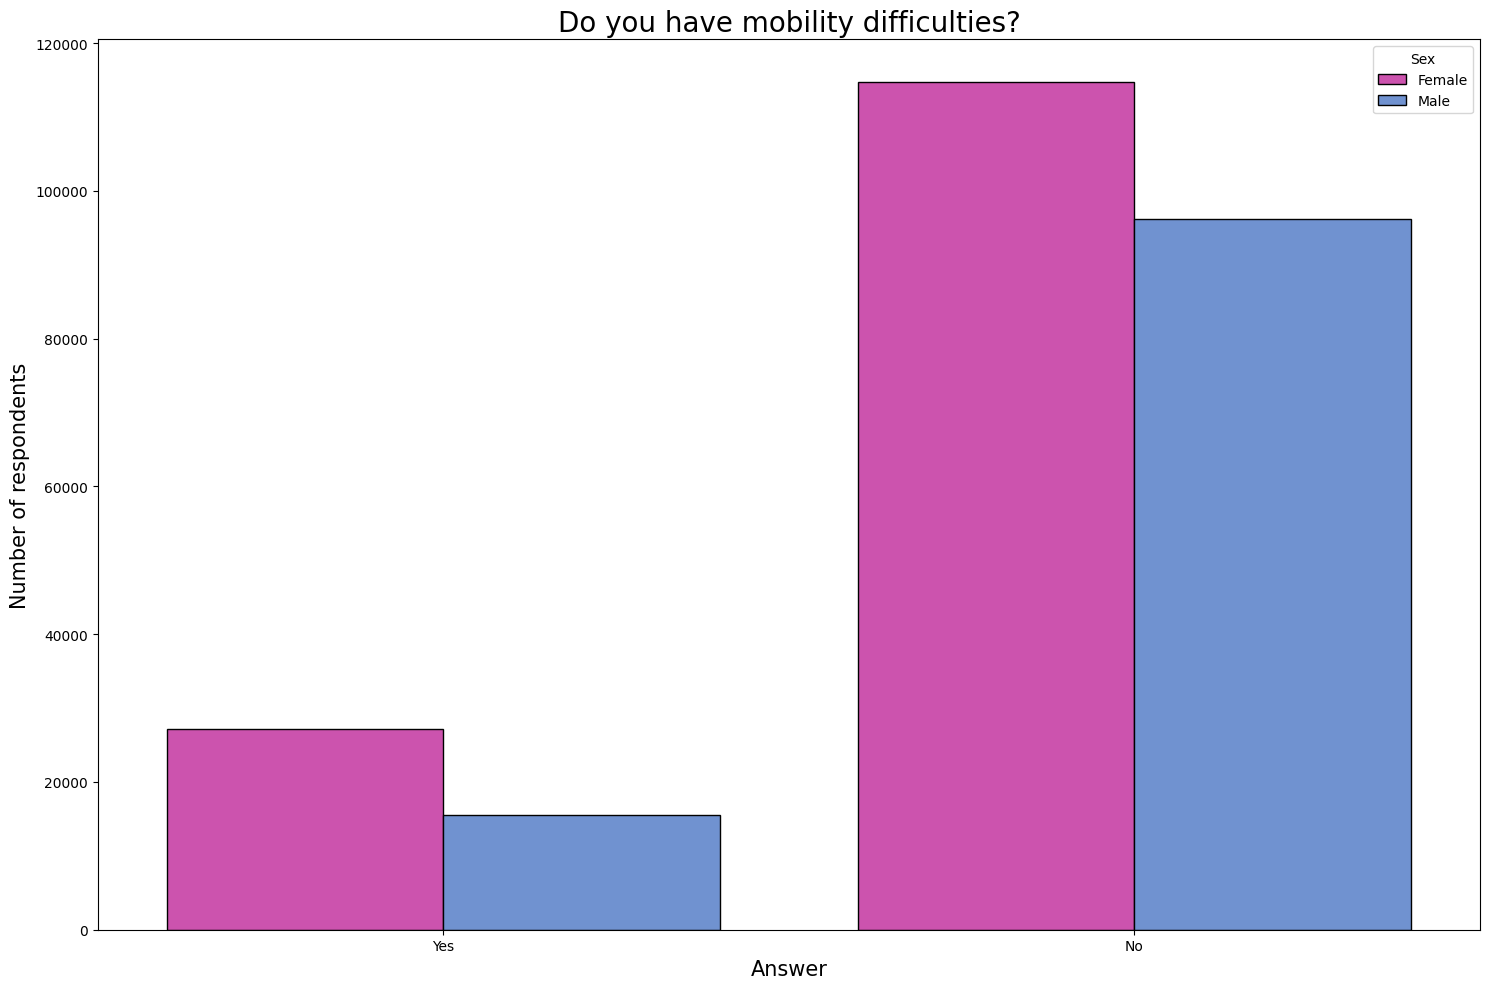

In [40]:
values_dw_order = ['Yes', 'No']
values_sex_order = ['Female', 'Male']
titles = ["Respondents who have mobility difficulties",
          "Respondents who don't have mobility difficulties"]

f, m = sex_metrics(df, 'Sex', 'DiffWalk', values_sex_order, values_dw_order)

for title, value in zip(titles, values_dw_order):
    display(Markdown(f"### **{title}**"))
    show_metric("Total", round(f[value] + m[value], 2))
    show_metric("Women", f[value])
    show_metric("Men", m[value])

group = df.groupby(['Sex', 'DiffWalk']).size().reset_index(name='count')

g_title = "Do you have mobility difficulties?"
x_label = "Answer"
y_label = "Number of respondents"
dict_colors = {'Female':'#E03FB8',
               'Male': '#608DE0'}
colors = list(dict_colors.values())

graph_diabetes = Graph(graph_title=g_title,
                       xlabel_name=x_label,
                       ylabel_name=y_label,
                       colors=colors)

graph_diabetes.bar_plot_sns(x='DiffWalk', y='count', data=group, hue='Sex', hue_order=values_sex_order, order=values_dw_order, legend=True)

After analysing this graph, which classifies respondents according to their gender and whether they have difficulty moving around, the following findings were identified:

**People with mobility difficulties**

This group represents **16.82%** of respondents, a relatively low proportion. When broken down by gender, **10.72%** are women and **6.1%** are men, again highlighting a female majority in this case.

**People without mobility difficulties**

**83.18%** of respondents belong to this group, which is encouraging, as it reflects that the majority do not face mobility problems. In this segment, women represent **45.25%**, outnumbering men, who make up **37.93%**.

**Trend analysis**

Although women show a higher proportion of both those with and without mobility difficulties, there is a clear tendency for this group not to experience mobility problems. On the other hand, an opposite trend is observed in men. It is important to consider the possible existence of a bias in the data that could influence these differences.

### **Respondents who have mobility difficulties**

Young: 0.05%

Young adulthood: 0.6%

Middle adulthood: 1.38%

Late adulthood: 3.7%

Old age: 11.09%

### **Respondents who don't have mobility difficulties**

Young: 2.2%

Young adulthood: 12.23%

Middle adulthood: 12.8%

Late adulthood: 18.82%

Old age: 37.13%

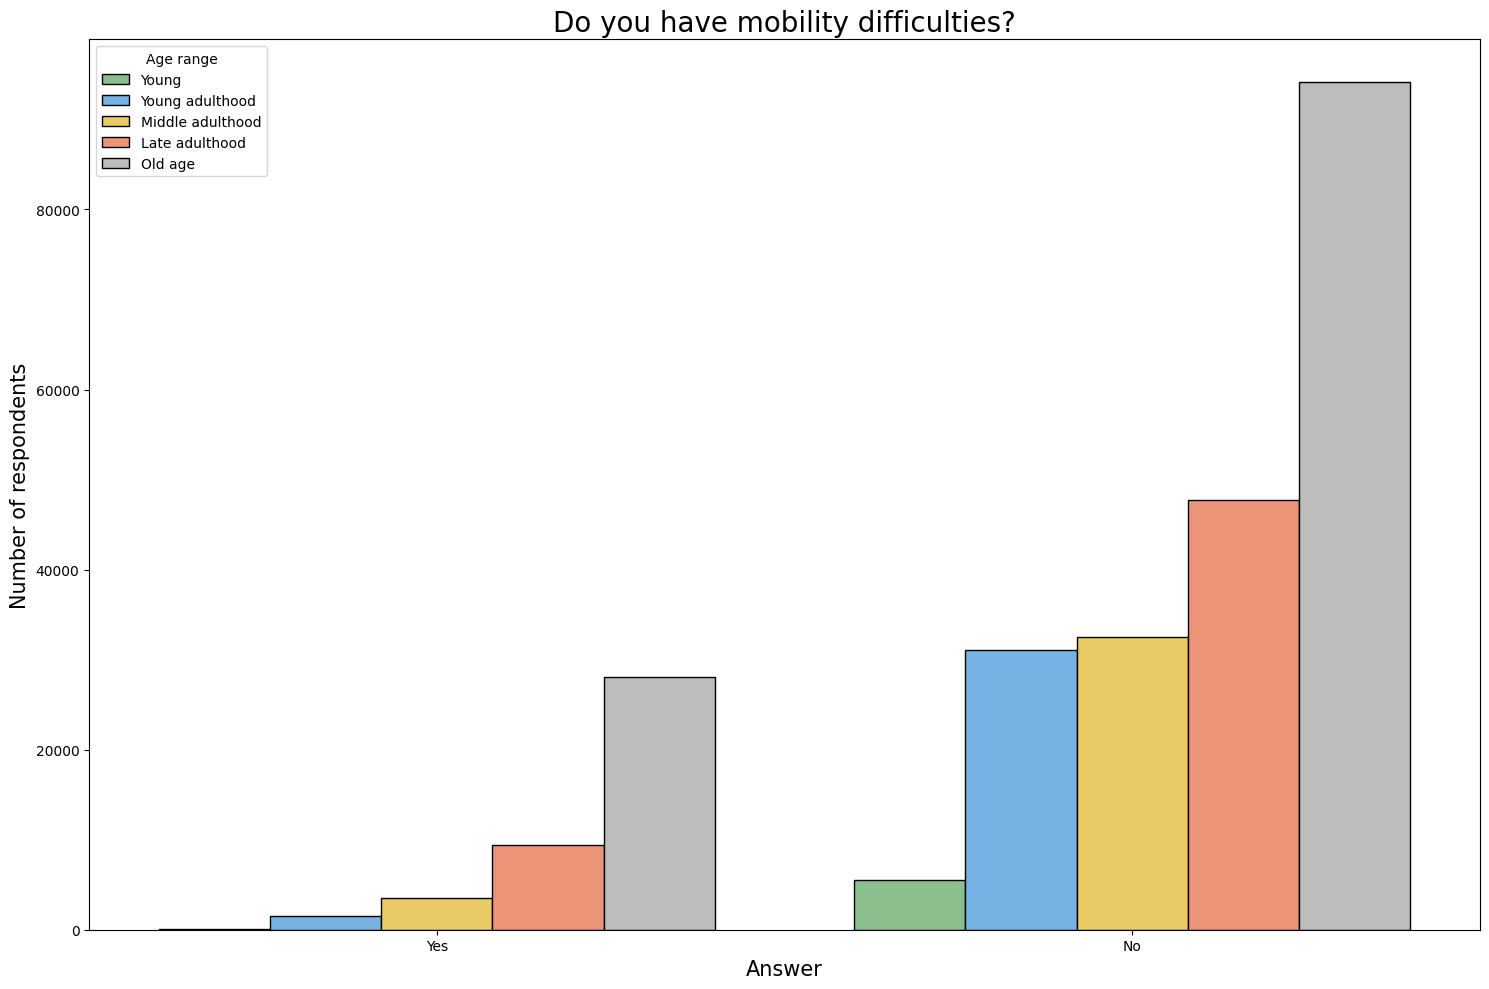

In [41]:
values_age_range_order = ['Young',
                          'Young adulthood',
                          'Middle adulthood',
                          'Late adulthood',
                          'Old age']
values_dw_order = ['Yes', 'No']
titles = ["Respondents who have mobility difficulties",
          "Respondents who don't have mobility difficulties"]

y, y_a, m_a, l_a, o_a = age_metrics(df, 'age_range', 'DiffWalk', values_age_range_order, values_dw_order)

metrics_dict = {"Young": y,
                "Young adulthood": y_a,
                "Middle adulthood": m_a,
                "Late adulthood": l_a,
                "Old age": o_a}

for title, value in zip(titles, values_dw_order):
    display(Markdown(f"### **{title}**"))
    for metric in metrics_dict:
        show_metric(metric, metrics_dict[metric][value])

group = df.groupby(['age_range', 'DiffWalk']).size().reset_index(name='count')
group.columns = ['Age range', 'DiffWalk', 'count']

g_title = "Do you have mobility difficulties?"
x_label = "Answer"
y_label = "Number of respondents"
dict_colors = {"Young":"#81C784", 
               "Young adulthood":"#64B5F6", 
               "Middle adulthood":"#FFD54F", 
               "Late adulthood":"#FF8A65",
               "Old age":"#BDBDBD"}
colors = list(dict_colors.values())

graph_diabetes = Graph(graph_title=g_title,
                       xlabel_name=x_label,
                       ylabel_name=y_label,
                       colors=colors)

graph_diabetes.bar_plot_sns(x='DiffWalk', y='count', data=group, hue='Age range', hue_order=values_age_range_order, order=values_dw_order, legend=True)

From the analysis of this graph, which presents data on respondents with and without mobility difficulties, the following findings were derived.
 
**People with mobility difficulties**

The ‘Old age’ category contains the highest proportion of people with mobility difficulties, with **11.09%**, which is evidence that this age group has greater barriers to mobility due to factors associated with ageing. This is followed by the ‘Late Adulthood’ group with **3.7%**, affirming that there is a greater likelihood of mobility difficulties with increasing age.

Smaller proportions are observed in the categories of ‘Middle adulthood’ (**1.38%**) and ‘Young adulthood’ (**0.6%**), while the ‘Young adulthood’ group has the lowest representation with **0.05%**, reflecting the low incidence of mobility problems at younger ages.

**People with no mobility difficulties**

The majority of respondents without mobility difficulties are also contained in the older age groups. The main ones are ‘Old age’ (**37.13%**) and ‘Late Adulthood’ (**18.82%**), indicating that, while the old age face higher risks of mobility problems, a significant proportion retain their ability to move around without problems.

Similar proportions are identified in the categories of ‘Middle Adulthood’ (**12.8%**) and ‘Young Adulthood’ (**12.23%**), while the ‘Young’ group represents **2.2%**. This reflects the fact that at young ages there are very few conditions for mobility.

**Trend analysis**

It is noticeable that, as age increases, so does the proportion of people with mobility difficulties, with the old age being the most affected group. However, within this same age group and those closest to it, a large proportion of people retain adequate mobility. This suggests that, although age is a determining risk factor, maintaining an active and healthy lifestyle could be key to preventing or minimising these difficulties.

### **Analysis respondents' annual income**

### **Respondents' annual income who have health care**

Less than $10,000: 3.35%

$10k to less than $15k: 4.23%

$15k to less than $20k: 5.65%

$20k to less than $25k: 7.19%

$25k to less than $35k: 9.5%

$35k to less than $50k: 13.63%

$50k to less than $75k: 16.49%

$75,000 or more: 35.08%

### **Respondents' annual income who don't have health care**

Less than $10,000: 0.52%

$10k to less than $15k: 0.42%

$15k to less than $20k: 0.66%

$20k to less than $25k: 0.75%

$25k to less than $35k: 0.7%

$35k to less than $50k: 0.75%

$50k to less than $75k: 0.54%

$75,000 or more: 0.55%

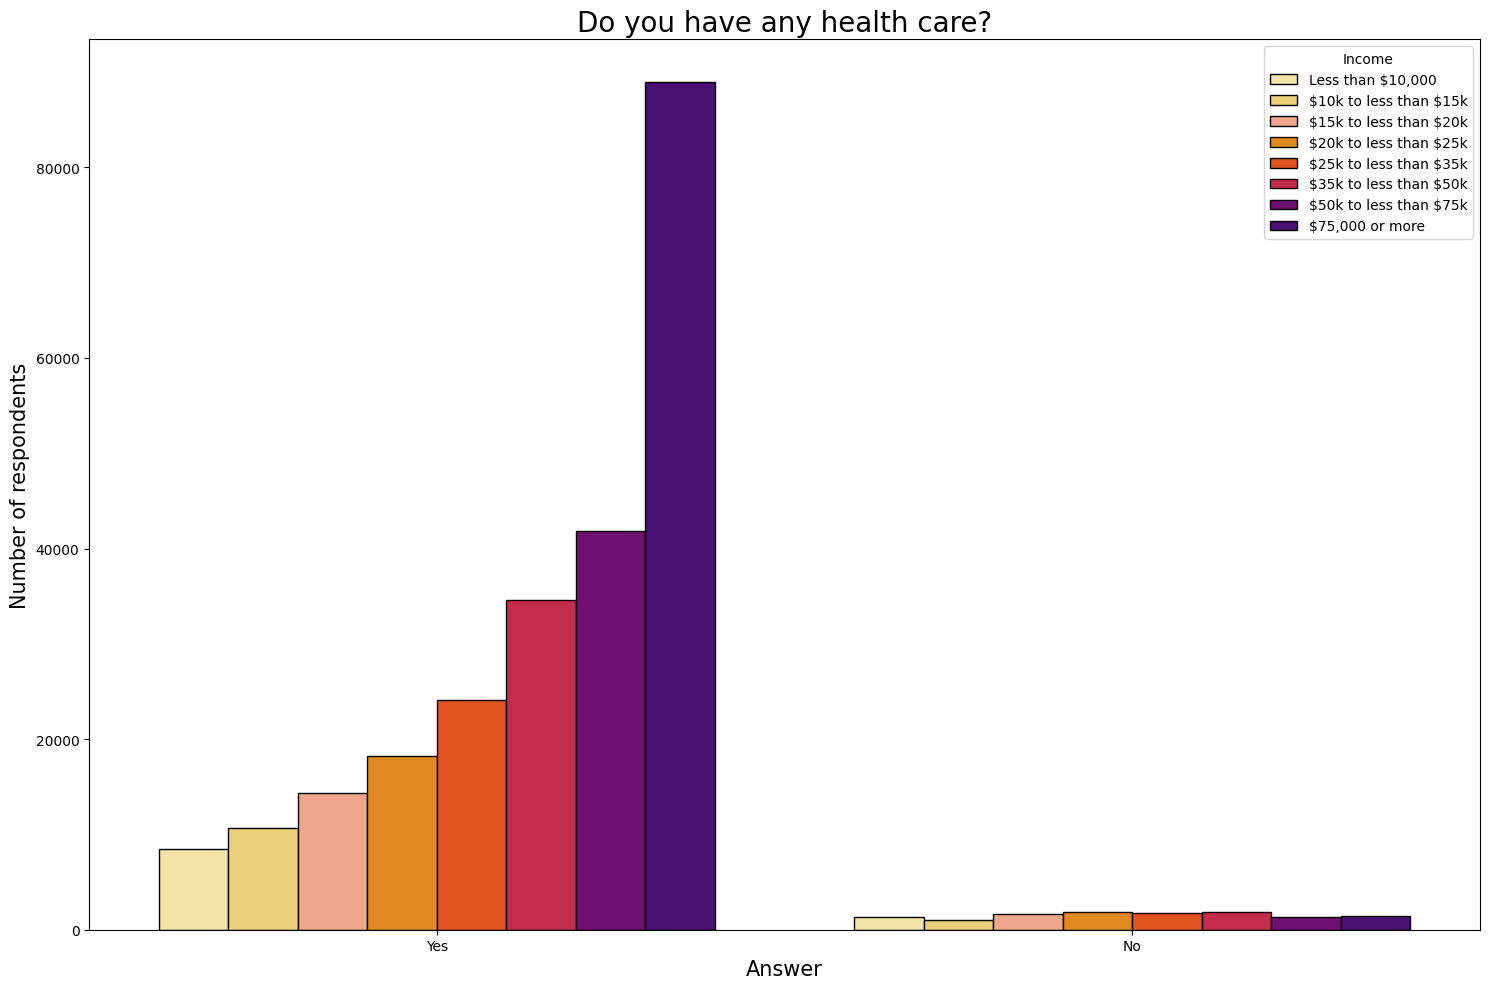

In [56]:
values_income_order = ['Less than $10,000', 
                '$10k to less than $15k', 
                '$15k to less than $20k', 
                '$20k to less than $25k',
                '$25k to less than $35k', 
                '$35k to less than $50k', 
                '$50k to less than $75k', 
                '$75,000 or more']

values_hec_order = ['Yes', 'No']

titles = ["Respondents' annual income who have health care",
          "Respondents' annual income who don't have health care"]

metrics = income_metrics(df, 'Income', 'AnyHealthcare', values_income_order, values_hec_order)

for title, value in zip(titles, values_hec_order):
    display(Markdown(f"### **{title}**"))
    for metric in metrics:
        show_metric(metric, metrics[metric][value])        

values_income_order_t = []

for value in values_income_order: 
    value_t = value.replace('$', '\\$')
    values_income_order_t.append(value_t)

group = df.groupby(['Income', 'AnyHealthcare']).size().reset_index(name='count')
group['Income'] = pd.Categorical(group['Income'], categories=values_income_order, ordered=True)
group['Income'] = group['Income'].str.replace(r'\$', '\\$', regex=True)

g_title = "Do you have any health care?"
x_label = "Answer"
y_label = "Number of respondents"
dict_colors = {"Less than $10,000": "#FFEB99",
    "$10k to $15k": "#FFD966",
    "$15k to $20k": "#FFA07A",
    "$20k to $25k": "#FF8C00",
    "$25k to $35k": "#FF4500",
    "$35k to $50k": "#DC143C",
    "$50k to $75k": "#800080",
    "$75k or more": "#4B0082"}
colors = list(dict_colors.values())

graph_diabetes = Graph(graph_title=g_title,
                       xlabel_name=x_label,
                       ylabel_name=y_label,
                       colors=colors)

graph_diabetes.bar_plot_sns(x='AnyHealthcare', y='count', data=group, hue='Income', hue_order=values_income_order_t, order=values_hec_order, legend=True)

From the analysis of this graph, which presents data on the annual income of respondents who have (and do not have) life insurance, the following insights were obtained.

**Annual income of respondents who have life insurance**

Among respondents who claimed to have life insurance, there is a favourable distribution towards the higher income brackets. Of those with life insurance, **35.08%** of respondents have annual incomes above \$75,000, representing the largest proportion of respondents. This is followed by the income bracket between $50,000 and $75,000, at **16.49%**, and the income bracket between $35,000 and $50,000, at **13.63%**. In the lower income brackets, the presence of people with life insurance is notably lower, with **3.35%** of respondents with incomes below $10,000 and **4.23%** in the $10,000 to $15,000 income bracket.

**Annual income of respondents who do not have life insurance**

On the other hand, the behaviour of those without life insurance is different. The majority of people without life insurance are concentrated in the lower income brackets, with **0.52%** of them having annual incomes of less than \$10,000. As we move up the ranks, we can see that the proportion of people without life insurance remains very low, with only **0.75%** in the $20,000 to $25,000 brackets and **0.75%** in the $35,000 to $50,000 brackets. It is notable that the higher brackets, such as incomes above $50,000, only represent a tiny fraction of those without life insurance, with **0.55%** of respondents reaching this category.

**Trend analysis**

The data show a clear trend in which people with higher incomes are more likely to have life insurance, while those with lower incomes are much less likely to have life insurance. This suggests that people with higher incomes are likely to have more resources available to secure their long-term well-being by taking out life insurance. In contrast, those with lower incomes do not find it important to purchase life insurance, reflecting a difference in financial capacity to cover this type of investment.

### **Respondents' annual income who did not attend a medical appointment in the last year because of cost**

Less than $10,000: 0.83%

$10k to less than $15k: 0.87%

$15k to less than $20k: 1.1%

$20k to less than $25k: 1.18%

$25k to less than $35k: 1.15%

$35k to less than $50k: 1.19%

$50k to less than $75k: 1.03%

$75,000 or more: 1.07%

### **Respondents' annual income who attended a medical appointment in the last year regardless of cost**

Less than $10,000: 3.04%

$10k to less than $15k: 3.78%

$15k to less than $20k: 5.21%

$20k to less than $25k: 6.76%

$25k to less than $35k: 9.05%

$35k to less than $50k: 13.19%

$50k to less than $75k: 16.0%

$75,000 or more: 34.56%

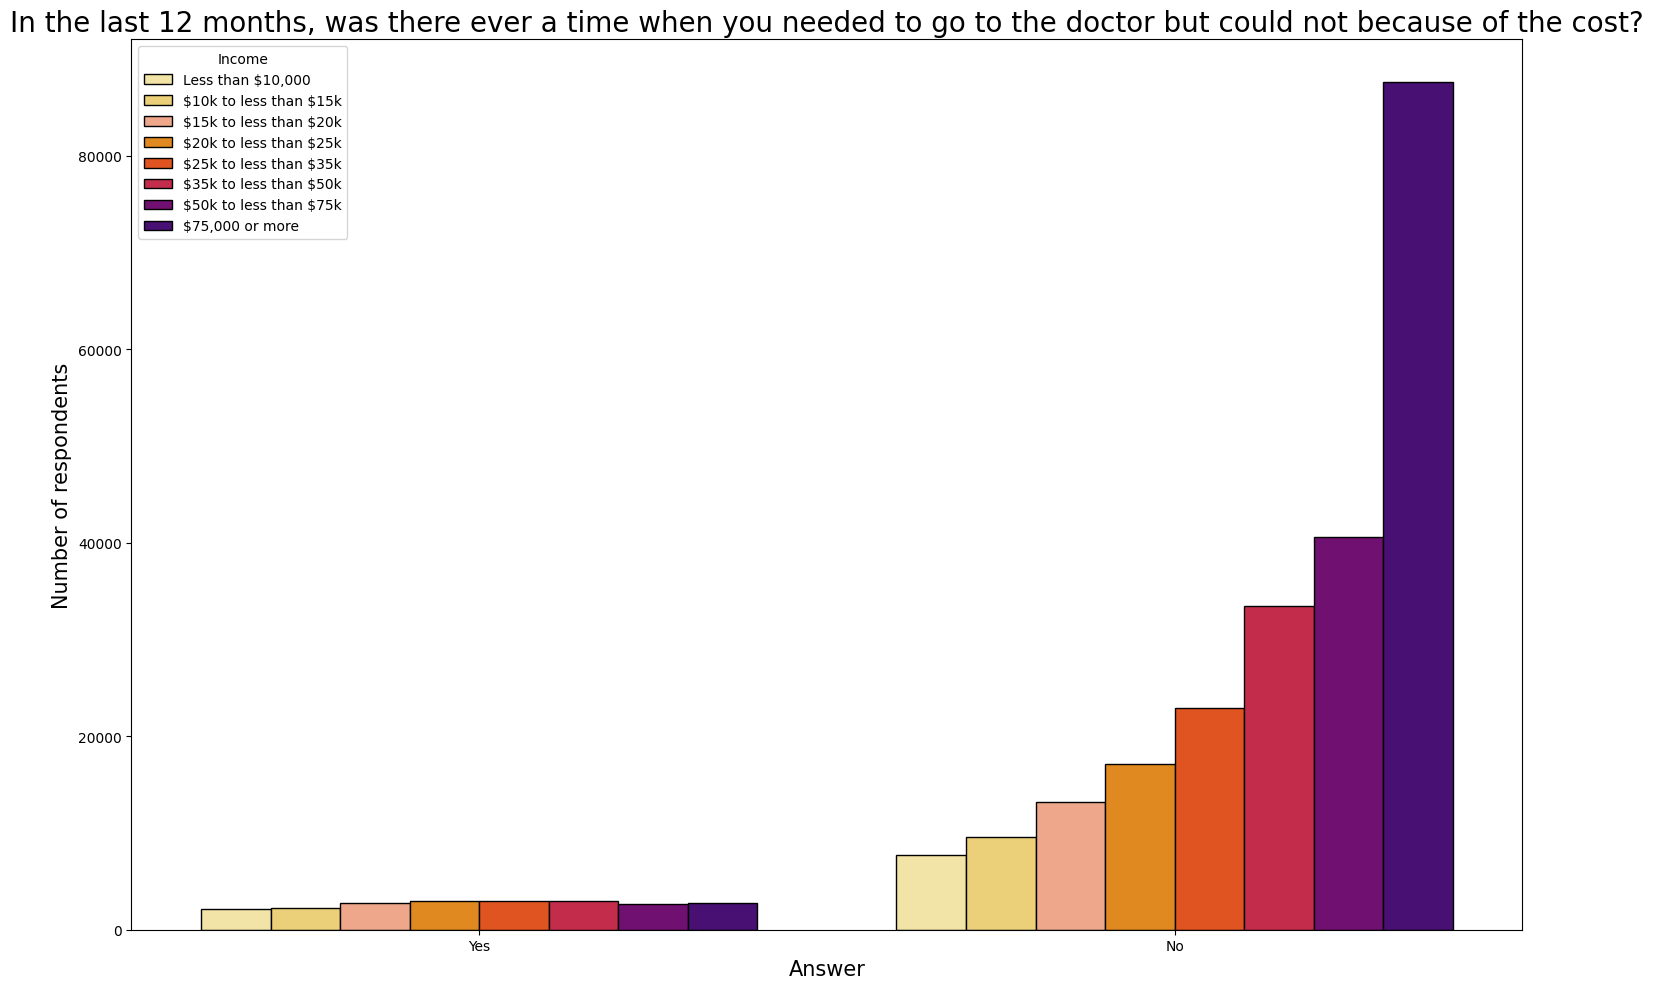

In [63]:
values_income_order = ['Less than $10,000', 
                '$10k to less than $15k', 
                '$15k to less than $20k', 
                '$20k to less than $25k',
                '$25k to less than $35k', 
                '$35k to less than $50k', 
                '$50k to less than $75k', 
                '$75,000 or more']

values_ndbc_order = ['Yes', 'No']

titles = ["Respondents' annual income who did not attend a medical appointment in the last year because of cost",
          "Respondents' annual income who attended a medical appointment in the last year regardless of cost"]

metrics = income_metrics(df, 'Income', 'NoDocbcCost', values_income_order, values_ndbc_order)

for title, value in zip(titles, values_ndbc_order):
    display(Markdown(f"### **{title}**"))
    for metric in metrics:
        show_metric(metric, metrics[metric][value])        

values_income_order_t = []

for value in values_income_order: 
    value_t = value.replace('$', '\\$')
    values_income_order_t.append(value_t)

group = df.groupby(['Income', 'NoDocbcCost']).size().reset_index(name='count')
group['Income'] = pd.Categorical(group['Income'], categories=values_income_order, ordered=True)
group['Income'] = group['Income'].str.replace(r'\$', '\\$', regex=True)

g_title = "In the last 12 months, was there ever a time when you needed to go to the doctor but could not because of the cost?"
x_label = "Answer"
y_label = "Number of respondents"
dict_colors = {"Less than $10,000": "#FFEB99",
    "$10k to $15k": "#FFD966",
    "$15k to $20k": "#FFA07A",
    "$20k to $25k": "#FF8C00",
    "$25k to $35k": "#FF4500",
    "$35k to $50k": "#DC143C",
    "$50k to $75k": "#800080",
    "$75k or more": "#4B0082"}
colors = list(dict_colors.values())

graph_diabetes = Graph(graph_title=g_title,
                       xlabel_name=x_label,
                       ylabel_name=y_label,
                       colors=colors)

graph_diabetes.bar_plot_sns(x='NoDocbcCost', y='count', data=group, hue='Income', hue_order=values_income_order_t, order=values_ndbc_order, legend=True)

After analysing the graph showing the annual income of respondents and their attendance at a medical appointment in the last 12 months, the following findings have been identified.

**Amount of respondents who indicated that they did not attend a medical appointment in the last 12 months**

Among respondents who indicated that they did not attend a medical appointment in the last year due to cost, the income distribution shows that the lower income ranges are more heavily represented. A **1.18%** of those with annual incomes between $20,000 and $25,000 were unable to access a medical appointment due to cost, with this being the bracket with the highest proportion. As income increases, the proportion of people not attending a medical appointment due to cost decreases, with **0.83%** of people with incomes below $10,000 and **0.87%** in the $10,000 to $15,000 range.

The higher income ranges, such as $35,000 to $50,000 and $50,000 to $75,000, have relatively similar percentages, around **1.03%** and **1.07%**, respectively. This reflects that, despite having greater resources, a small proportion of people in these ranges still face financial difficulties in accessing health care.

**Annual income of respondents who attended a medical appointment in the last year regardless of cost**

On the other hand, those who attended a medical appointment regardless of cost show a completely different behaviour. **34.56%** of people with annual incomes above $75,000 attended a doctor's appointment in the last year, representing the largest proportion of respondents. The brackets between $50,000 and $75,000, and $35,000 to $50,000, also have high proportions, with **16.0%** and **13.19%**, respectively.

In the lower income brackets, attendance at medical appointments increases progressively, with **3.04%** of people with incomes below $10,000 attending an appointment, and **3.78%** in the $10,000 to $15,000 bracket. The middle brackets, such as $15,000 to $20,000 and $20,000 to $25,000, also show an increase in the proportion of people who attended medical appointments, reaching **5.21%** and **6.76%**, respectively.

**Trend analysis**

The data reflect a clear difference in access to a health professional according to income level. Those with lower incomes appear to face greater financial difficulties in accessing health care, with a significant proportion choosing not to attend medical appointments due to costs. However, even among those on lower incomes, there is a percentage who continue to seek medical care, which may reflect that, for respondents, health is more important than money.

In contrast, people with higher incomes are more likely to attend medical appointments regardless of cost. Medical care appears to be more prevalent among higher income brackets, suggesting that the economic factor has a considerable impact on the ability to access health services.

### **Respondents' annual income who had a cholesterol check in the last 5 years**

Less than $10,000: 3.69%

$10k to less than $15k: 4.47%

$15k to less than $20k: 6.05%

$20k to less than $25k: 7.62%

$25k to less than $35k: 9.81%

$35k to less than $50k: 13.81%

$50k to less than $75k: 16.39%

$75,000 or more: 34.44%

### **Respondents' annual income who had not a cholesterol check in the last 5 years**

Less than $10,000: 0.18%

$10k to less than $15k: 0.18%

$15k to less than $20k: 0.25%

$20k to less than $25k: 0.32%

$25k to less than $35k: 0.39%

$35k to less than $50k: 0.57%

$50k to less than $75k: 0.65%

$75,000 or more: 1.19%

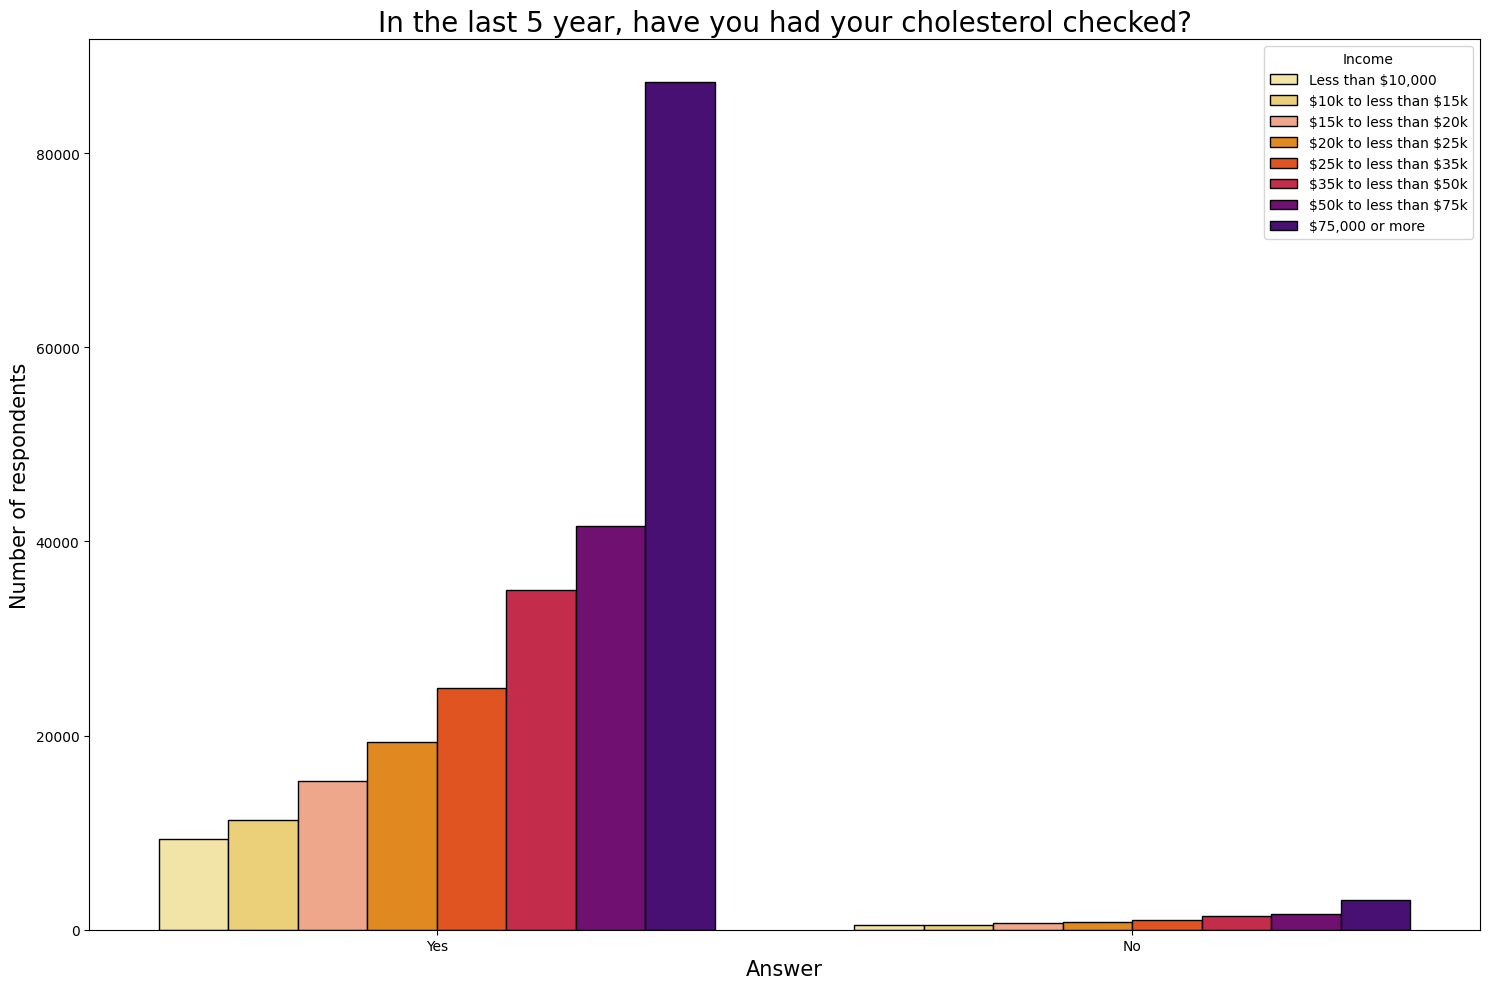

In [66]:
values_income_order = ['Less than $10,000', 
                '$10k to less than $15k', 
                '$15k to less than $20k', 
                '$20k to less than $25k',
                '$25k to less than $35k', 
                '$35k to less than $50k', 
                '$50k to less than $75k', 
                '$75,000 or more']

values_cc_order = ['Yes', 'No']

titles = ["Respondents' annual income who had a cholesterol check in the last 5 years",
          "Respondents' annual income who had not a cholesterol check in the last 5 years"]

metrics = income_metrics(df, 'Income', 'CholCheck', values_income_order, values_ndbc_order)

for title, value in zip(titles, values_cc_order):
    display(Markdown(f"### **{title}**"))
    for metric in metrics:
        show_metric(metric, metrics[metric][value])        

values_income_order_t = []

for value in values_income_order: 
    value_t = value.replace('$', '\\$')
    values_income_order_t.append(value_t)

group = df.groupby(['Income', 'CholCheck']).size().reset_index(name='count')
group['Income'] = pd.Categorical(group['Income'], categories=values_income_order, ordered=True)
group['Income'] = group['Income'].str.replace(r'\$', '\\$', regex=True)

g_title = "In the last 5 year, have you had your cholesterol checked?"
x_label = "Answer"
y_label = "Number of respondents"
dict_colors = {"Less than $10,000": "#FFEB99",
    "$10k to $15k": "#FFD966",
    "$15k to $20k": "#FFA07A",
    "$20k to $25k": "#FF8C00",
    "$25k to $35k": "#FF4500",
    "$35k to $50k": "#DC143C",
    "$50k to $75k": "#800080",
    "$75k or more": "#4B0082"}
colors = list(dict_colors.values())

graph_diabetes = Graph(graph_title=g_title,
                       xlabel_name=x_label,
                       ylabel_name=y_label,
                       colors=colors)

graph_diabetes.bar_plot_sns(x='CholCheck', y='count', data=group, hue='Income', hue_order=values_income_order_t, order=values_cc_order, legend=True)

The relationship between annual income and the probability of having a cholesterol check in the last five years offers valuable insights into how socioeconomic factors influence access to and engagement with preventive healthcare measures.

**Respondents' annual income who had a cholesterol check in the last 5 years**

Higher-income groups are more likely to have had a cholesterol check within the last five years, reflecting the connection between financial resources and access to preventive care:

* Less than $10,000: **3.69%**
* $10k to less than $15k: **4.47%**
* $15k to less than $20k: **6.05%**
* $20k to less than $25k: **7.62%**
* $25k to less than $35k: **9.81%**
* $35k to less than $50k: **13.81%**
* $50k to less than $75k: **16.39%**
* $75,000 or more: **34.44%**

**Respondents' annual income who had not a cholesterol check in the last 5 years**

In contrast, lower-income groups are less likely to have undergone a cholesterol check within the same timeframe, although the percentages are relatively small across all income brackets:

* Less than $10,000: **0.18%**
* $10k to less than $15k: **0.18%**
* $15k to less than $20k: **0.25%**
* $20k to less than $25k: **0.32%**
* $25k to less than $35k: **0.39%**
* $35k to less than $50k: **0.57%**
* $50k to less than $75k: **0.65%**
* $75,000 or more: **1.19%**

**Trend analysis**

The data reveals a clear correlation between income level and the likelihood of having a cholesterol check. Individuals in higher income brackets (e.g., earning $75,000 or more annually) are significantly more likely (**34.44%**) to have undergone this preventive test compared to those in lower income brackets (e.g., less than $10,000 annually at **3.69%**).

On the other hand, respondents who had not undergone a cholesterol check make up a smaller percentage across all income levels. However, a similar trend is observed, with higher-income groups showing slightly higher rates, though still minimal (**1.19%** for those earning $75,000 or more annually).

This analysis underscores the impact of socioeconomic status on access to healthcare services. Higher incomes likely afford individuals better access to regular medical checkups, health education, and insurance coverage, which facilitates preventive measures like cholesterol checks. Addressing income disparities could be crucial in improving access to preventive healthcare services for lower-income groups.